# Final Project Submission

**Student's Name:** 
-   Leonard Koyio

**Students' Pace:** Part-time 

**Scheduled Project Review Date/Time:** [01/09/2024, 14:59]

**Instructor Name:** Samuel Karu

**Blog Post URL:** https://github.com/leonardkoyio/Phase-3-Project-_v1


# **1. INTRODUCTION**

## Objectives
The primary goal of this project is to develop a predictive model that accurately determines the functionality status of water pumps across Tanzania. By predicting which pumps are functional, need repairs, or are non-functional, we aim to support the Government of Tanzania in optimizing their maintenance operations and ensuring a reliable water supply for communities.

## Stakeholder
The main stakeholder for this project is the Government of Tanzania, specifically the Ministry of Water. The Government is interested in efficiently managing and maintaining the water pump infrastructure to minimize downtime and costs associated with repairs and replacements. By leveraging data-driven insights, the Government can prioritize maintenance efforts, allocate resources effectively, and ultimately improve water accessibility for its citizens.

## Problem Statement
Maintaining a large network of water pumps across Tanzania presents significant challenges, especially in remote and rural areas. With varying factors influencing pump functionality, such as age, installation quality, environmental conditions, and usage patterns, it is crucial to develop a predictive model that can forecast pump status accurately. A reliable model will help in preemptively identifying pumps that are likely to fail or need maintenance, thereby reducing the likelihood of prolonged water shortages and enhancing the overall efficiency of the maintenance process.

# **2. BUSINESS UNDERSTANDING**

## Business Objective
The business objective of this project is to assist the Government of Tanzania in optimizing the maintenance strategy for water pumps by providing a tool that can predict pump functionality. This predictive capability will enable the Government to make informed decisions about where and when to allocate maintenance resources, thus preventing failures and ensuring that communities have consistent access to clean and potable water.

## Business Problem
The business problem addressed in this project is the inefficient allocation and wastage of maintenance resources due to a lack of predictive insights. Without a clear understanding of which pumps are at risk of becoming non-functional or needing repairs, maintenance teams may waste energy and resources inspecting functional pumps and under-service those in need of attention, leading to increased operational costs and disruptions in water supply to citizens of Tanzania.

## Business Benefits
By implementing a predictive model for pump functionality, the Government of Tanzania stands to gain several benefits:

- **Improved Resource Allocation**: By knowing which pumps are likely to fail, maintenance teams can prioritize their efforts on the most critical units, optimizing the use of limited resources. This ensures that efforts are focused on pumps that require immediate attention, thereby enhancing service delivery and minimizing downtime.

- **Cost Savings**: Preventative maintenance is often more cost-effective than reactive repairs. By identifying pumps that need attention before they break down, the Government can reduce repair costs and extend the lifespan of the pumps. This proactive approach reduces the frequency and severity of pump failures, leading to significant cost savings over time.

- **Enhanced Water Access**: Ensuring that pumps are functional and well-maintained means that communities will have better access to clean water, which is vital for public health and wellbeing. By reducing the number of non-functional pumps, the project directly contributes to improving the reliability of water services, thereby enhancing overall service delivery to the public.

- **Data-Driven Decision Making**: The use of data analytics provides the Government with a robust tool for decision-making, fostering a culture of data-driven strategies that can be applied to other areas of public service. This shift towards data-driven decision-making not only improves the efficiency of water pump maintenance but also sets a precedent for using data to enhance other public services.

- **Improved Service Delivery**: The predictive model developed in this project allows for a more targeted and efficient approach to maintaining water pumps. By reducing the time pumps spend out of service and ensuring quicker repairs, the project enhances the overall service delivery of water resources to Tanzanian communities. This improvement in service delivery can lead to increased public trust and satisfaction with the Government's management of essential services.

By addressing these business needs, this project aims to provide a scalable and effective solution to enhance the management of water resources in Tanzania, ultimately improving the quality of life for its citizens through better service delivery and sustainable water management practices.


# **3. DATA UNDERSTANDING**

## Imports

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler,label_binarize


# Model training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Model evaluation
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score, recall_score, 
                             precision_score, f1_score, roc_auc_score, roc_curve, auc)

# Model validation
from sklearn.model_selection import train_test_split, cross_val_score

# Handling imbalanced data
from imblearn.over_sampling import SMOTE



## Data Loading

In [4]:
df_features= pd.read_csv('data/train_features.csv')
df_labels= pd.read_csv('data/train_labels.csv')
df_test= pd.read_csv('data/test_values.csv')
df_submit = pd.read_csv('data/SubmissionFormat.csv')

In [5]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
df_features.shape

(59400, 40)

In [7]:
df_features.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')


## Data Sources
The dataset for this project is sourced from the Taarifa waterpoints dashboard, which aggregates data from the Tanzania Ministry of Water. Taarifa is an open-source platform designed to crowdsource the reporting and triaging of infrastructure-related issues. It serves as a bridge between citizens and their local government, facilitating better management and maintenance of public services. The data provided is specifically tailored to assist in identifying the functionality status of water pumps across Tanzania, making it highly relevant for this project.

The data collected includes various features that describe the physical, geographical, and administrative aspects of water points in Tanzania. These features are crucial for developing a robust predictive model to classify the functionality of water pumps, ensuring effective resource allocation and maintenance.

## Dataset Description
The dataset comprises 59,400 rows, each representing a water point with multiple features that provide detailed information about each location. After removing redundant columns, the following key features remain:

- **amount_tsh**: Total static head, indicating the amount of water available at the water point.
- **date_recorded**: The date when the data entry was made, providing temporal context for the dataset.
- **funder**: The organization or entity that funded the construction of the well, which could impact its maintenance and durability.
- **gps_height**: The altitude of the well, which might influence water availability and quality.
- **installer**: The organization that installed the well, potentially affecting the installation quality and subsequent functionality.
- **longitude and latitude**: GPS coordinates that help in geographically pinpointing the location of the water points.
- **wpt_name**: Name of the water point, if available, for identification purposes.
- **num_private**: (Not specified) – This feature lacks a clear definition but is retained for completeness.
- **basin**: Geographic water basin, which could influence the water source type and quality.
- **region_code and district_code**: Coded geographic locations that provide a structured understanding of where the water points are situated.
- **lga**: Local Government Authorities responsible for public services, including water management.
- **population**: The population around the well, indicating the number of people relying on it, which can impact wear and tear.
- **public_meeting**: A boolean indicating whether a public meeting was held, which may reflect community involvement in maintenance.
- **recorded_by**: The entity or group entering the data, providing context for data source reliability.
- **scheme_management and scheme_name**: Describes the management and operational scheme of the water point, relevant for maintenance and functionality.
- **permit**: Indicates whether the water point is permitted, affecting its legal standing and possibly its upkeep.
- **construction_year**: The year the water point was constructed, which directly impacts its age and potential functionality.
- **extraction_type_class**: Categorization of the extraction type into broader classes.
- **management_group**: Grouping of management types into broader categories.
- **payment_type**: The method of payment for water usage, which could influence maintenance funding and frequency.
- **quality_group**: Grouping of water quality into similar categories, relevant for public health and safety.
- **quantity_group**: Grouping of water quantity into similar categories, essential for understanding resource availability.
- **source_type and source_class**: Classification of the water source, which can affect water quality and sustainability.
- **waterpoint_type_group**: Grouping of water points by type, which might influence functionality and maintenance needs.

## Suitability of the Data
The dataset is highly suitable for the project's objectives as it encompasses comprehensive information regarding the physical, operational, and geographical characteristics of water points across Tanzania. These features provide a well-rounded view of the factors that could influence a water pump's functionality, making them ideal for training predictive models.

## Dataset Size and Descriptive Statistics
The dataset includes 59,400 records, each representing a water point with the aforementioned features. Descriptive statistics such as mean, median, mode, and standard deviation have been calculated for numerical features to understand their distribution and variability. Categorical features have been analyzed for frequency distribution to understand the most common values and their potential impact on water pump functionality.

## Justification for Feature Inclusion
Each feature in the dataset has been included based on its relevance to understanding and predicting water pump functionality. For example:
- **Geographical Features (longitude, latitude, region_code, district_code, basin)**: These help understand environmental conditions that may affect the water points.
- **Operational Features (management_group, scheme_management, permit)**: These indicate how the water points are managed and maintained, which directly impacts functionality.
- **Physical Features (gps_height, construction_year, amount_tsh)**: These describe the physical state of the water points, crucial for assessing their operational status.
- However, to build an efficient and effective predictive model, we will further analyze the data to identify the most relevant features. This process will involve feature selection techniques to determine which attributes have the most predictive power for our target variable. The goal is to optimize the model's performance by retaining only those features that contribute significantly to accurate predictions, thereby improving both the interpretability and efficiency of the model.

## Limitations of the Data
While the dataset is extensive and covers a broad range of relevant features, there are some limitations:
- **Missing or Undefined Data**: Some features, such as `num_private`, are not clearly defined, which could lead to potential ambiguities in the model.
- **Temporal Limitations**: The data is a snapshot and may not account for seasonal variations or changes over time.
- **Potential Bias**: The data collected might be biased based on who reported it and how it was recorded, impacting its overall accuracy and reliability.

Despite these limitations, the dataset provides a robust foundation for building a predictive model to support the Tanzanian government in enhancing water service delivery through improved maintenance strategies.


# **4. EXPLORATORY DATA ANALYSIS (EDA)**

Comparing the length of the target and the feature dataframes, if they are the same length as expected, The 2 data frames shall be concatenated so as to clean the data effectively.

In [8]:
len(df_features) == len(df_labels)

True

In [9]:
# concatenating the dataframes
df = pd.merge(df_features, df_labels, on='id')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [10]:
#inspecting the target variables
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

This is ternary classification problem since the target has 3 possible values

df_features.columns

In [11]:
df_features.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

### The Features in This Dataset

The following set of information about the waterpoints is provided:

- **amount_tsh**: Total static head (amount of water available to the waterpoint)
- **date_recorded**: The date the row was entered
- **funder**: Who funded the well
- **gps_height**: Altitude of the well
- **installer**: Organization that installed the well
- **longitude**: GPS coordinate
- **latitude**: GPS coordinate
- **wpt_name**: Name of the waterpoint, if there is one
- **num_private**: _(Not specified)_
- **basin**: Geographic water basin
- **subvillage**: Geographic location
- **region**: Geographic location
- **region_code**: Geographic location (coded)
- **district_code**: Geographic location (coded)
- **lga**: Geographic location
- **ward**: Geographic location
- **population**: Population around the well
- **public_meeting**: True/False, indicating if a public meeting was held
- **recorded_by**: Group entering this row of data
- **scheme_management**: Who operates the waterpoint
- **scheme_name**: The name of the management scheme
- **permit**: Whether the waterpoint is permitted (True/False)
- **construction_year**: Year the waterpoint was constructed
- **extraction_type**: The kind of extraction method the waterpoint uses
- **extraction_type_group**: The extraction type grouped by similar methods
- **extraction_type_class**: The extraction type categorized into broader classes
- **management**: How the waterpoint is managed
- **management_group**: The management grouped into broader categories
- **payment**: The cost structure of the water
- **payment_type**: The specific type of payment method
- **water_quality**: The quality of the water
- **quality_group**: The quality grouped by similar qualities
- **quantity**: The quantity of water
- **quantity_group**: The quantity grouped by similar quantities
- **source**: The source of the water
- **source_type**: The type of water source
- **source_class**: The broader class of the water source
- **waterpoint_type**: The specific type of waterpoint
- **waterpoint_type_group**: The type of waterpoint grouped by similar types


In [12]:
df.sample(n=10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
44379,51499,0.0,2013-03-26,Oikos E.Africa/european Union,1523,Oikos E .Africa,36.904991,-3.255215,Elisa Kaaya,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
38273,6285,0.0,2013-02-14,Theonas Mnyama,1319,Hesawa,34.271602,-1.718760,Theonas Mnyama,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
15786,71423,0.0,2012-10-15,Tasaf,0,TASAF,32.189633,-3.669360,Shule Ya Sekondari,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
58342,43773,500.0,2011-03-24,Ir,321,Ir,37.007105,-7.567581,Mama Uduleli,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
23999,22268,0.0,2012-11-06,Tlc/seleman Mang'ombe,0,TLC/Seleman Mang'ombe,32.510970,-4.398781,Seleman Mang'Ombe,0,...,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
55071,7932,0.0,2011-04-02,Government Of Tanzania,0,Government,33.050254,-8.482733,Shuleni,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
8764,26922,0.0,2013-02-26,Adra,1639,ADRA,35.480778,-4.271709,Sumary,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe multiple,communal standpipe,functional
37512,60808,0.0,2012-10-23,Rwssp,0,DWE,32.532499,-4.052063,Kwa Peter Simoni,0,...,milky,milky,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,functional
38654,24715,500.0,2011-02-26,No,465,No,37.065645,-6.807007,Kwa Idd Salum,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
10653,42128,0.0,2013-02-06,Government Of Tanzania,57,DWE,39.124723,-8.541236,Kawia,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional


- On inspection, some columns e.g `quantity` and `quantity_group` seem to have identical information. Thus, we first verify if indeed this is the case

In [13]:
# Check if columns are identical
are_identical = (df['quantity'] == df['quantity_group']).all()

print("Columns are identical:", are_identical)

Columns are identical: True


## Data Cleaning

### Column Inspection Comparison

To streamline our dataset and remove redundancy, we will perform the following steps:

1. **Identify Columns with Similar Names or Descriptions**  
   We'll start by identifying columns that have similar names or descriptions. This helps us determine which columns might contain overlapping information.

2. **Compare Column Content**  
   For columns identified as similar, we will conduct further checks to compare their content. This involves:
   - **Exact Equality Check**: Verifying if the values in the columns are identical for each row.
   - **Handling Missing Values**: Ensuring that missing values are considered in the comparison.
   
3. **Trim Down the Dataset**  
   Based on the comparison results, we will:
   - **Remove Redundant Columns**: Eliminate columns that contain duplicate or redundant information.
   - **Optimize the Dataset**: Reduce the dataset size and complexity by retaining only the necessary columns.

By following these steps, we will improve the quality and efficiency of our dataset, ensuring that we work with clean and relevant data.


In [14]:
# list to compile all redundant columns to remove on the test dataset as well
redundant_cols = []

In [15]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [16]:
locations = ['subvillage','region','region_code','district_code','lga','ward']
df[locations].head()

,subvillage,region,region_code,district_code,lga,ward
0,Mnyusi B,Iringa,11,5,Ludewa,Mundindi
1,Nyamara,Mara,20,2,Serengeti,Natta
2,Majengo,Manyara,21,4,Simanjiro,Ngorika
3,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu
4,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi


In [17]:
df['region_code'].describe()

count    59400.000000
mean        15.297003
std         17.587406
min          1.000000
25%          5.000000
50%         12.000000
75%         17.000000
max         99.000000
Name: region_code, dtype: float64

In [18]:
for element in locations:
        print(f"Column : {element}, Unique values : {len(df[element].unique())}")

Column : subvillage, Unique values : 19288
Column : region, Unique values : 21
Column : region_code, Unique values : 27
Column : district_code, Unique values : 20
Column : lga, Unique values : 125
Column : ward, Unique values : 2092


## Column Selection for Logistic Regression and Decision Tree Models

### 1. Categorical Variables

- **Decision Trees**: Handle categorical variables well. You can use all categorical columns directly as decision trees can split on different categories without numerical encoding.
  
- **Logistic Regression**: Requires numerical input. Categorical variables need to be encoded into numerical formats, typically using one-hot encoding or label encoding.

### 2. Column Selection

- **`subvillage`**: 19,288 unique values
  - **Note**: High cardinality may make this column challenging to encode and could lead to overfitting. Consider not using it directly.

- **`region`**: 21 unique values
  - **Note**: Moderate number of categories. Can be encoded using one-hot encoding or label encoding.

- **`region_code`**: 27 unique values
  - **Note**: Similar to `region`, this column has a manageable number of categories and can be used after encoding.

- **`district_code`**: 20 unique values
  - **Note**: Manageable number of categories. Suitable for encoding.

- **`lga`**: 125 unique values
  - **Note**: High number of unique values, which may be challenging for encoding and could lead to overfitting.

- **`ward`**: 2,092 unique values
  - **Note**: Very high cardinality, potentially problematic for encoding and may not provide much predictive value.

### Recommendations

- **Decision Trees**: You can use all columns directly. Decision trees handle categorical variables well and can manage high-cardinality features without extensive preprocessing.

- **Logistic Regression**:
  - **Use Columns with Fewer Unique Values**: Start with  `region_code`, `district_code`, and `lga` due to their more manageable number of unique values.
  - **Consider Feature Reduction**: Avoid using `subvillage` and `ward` directly because of their high cardinality. Consider aggregating or grouping these columns to reduce the number of unique values.
  - **One-Hot Encoding**: Apply one-hot encoding for categorical columns that have a manageable number of unique values.


- All this seem to show information about geographical location. From inspection, `district_code` and `region_code` seem to be the most suitable since they are codes of locations and have relatively fewer classes (80 for `district_code`, 100 for `region_code`)

In [19]:
df_concise = df.drop(['subvillage', 'ward','region'], axis = 1)
df_concise.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'region_code', 'district_code', 'lga', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [20]:
redundant_cols += ['subvillage','region','ward']

## We create a function to display relevant info for other similar columns...


In [21]:
def column_info(similar_cols):
    for element in similar_cols:
        print(f"Column : {element}, Unique values : {len(df[element].unique())}")
    for element in range(len(similar_cols)):
        print (f"Column: {similar_cols[element]}")
        for row in df_concise[similar_cols[element]].unique():
            print(row)
        print('\n')


## Data Cleaning - Removing reduntant columns

Next up...
- **extraction_type**: The kind of extraction method the waterpoint uses
- **extraction_type_group**: The extraction type grouped by similar methods
- **extraction_type_class**: The extraction type categorized into broader classes

In [22]:
extraction = ['extraction_type','extraction_type_group','extraction_type_class']
column_info(extraction)

Column : extraction_type, Unique values : 18
Column : extraction_type_group, Unique values : 13
Column : extraction_type_class, Unique values : 7
Column: extraction_type
gravity
submersible
swn 80
nira/tanira
india mark ii
other
ksb
mono
windmill
afridev
other - rope pump
india mark iii
other - swn 81
other - play pump
cemo
climax
walimi
other - mkulima/shinyanga


Column: extraction_type_group
gravity
submersible
swn 80
nira/tanira
india mark ii
other
mono
wind-powered
afridev
rope pump
india mark iii
other handpump
other motorpump


Column: extraction_type_class
gravity
submersible
handpump
other
motorpump
wind-powered
rope pump




## Feature Selection Rationale

For the extraction method features, we compared three columns:

- **`extraction_type`**: 18 unique values.
- **`extraction_type_group`**: 13 unique values.
- **`extraction_type_class`**: 7 unique values.

### Decision

We chose **`extraction_type_class`** because:

- **Simplification**: Fewer unique values, making the data easier to handle and less prone to overfitting.
- **Relevance**: Provides essential information about extraction methods in a more generalized form, maintaining important distinctions without excessive detail.

This choice balances detail and manageability, enhancing model performance and interpretability.


In [23]:
df_concise = df_concise.drop(['extraction_type','extraction_type_group'], axis = 1)


In [24]:
redundant_cols += ['extraction_type','extraction_type_group']

Next up...
- **management**: How the waterpoint is managed
- **management_group**: The management grouped into broader categories

In [25]:
management = ['management','management_group']
column_info(management)

Column : management, Unique values : 12
Column : management_group, Unique values : 5
Column: management
vwc
wug
other
private operator
water board
wua
company
water authority
parastatal
unknown
other - school
trust


Column: management_group
user-group
other
commercial
parastatal
unknown




## Feature Selection Rationale

For the management-related features, we compared two columns:

- **`management`**: 12 unique values.
- **`management_group`**: 5 unique values.

### Decision

We chose **`management_group`** because:

- **Simplification**: Fewer unique values, which reduces complexity and potential noise in the model.
- **Generalization**: Provides a broader classification that still captures essential distinctions without overwhelming detail.

This choice ensures a more streamlined dataset while retaining key information about management types.


In [26]:
df_concise = df_concise.drop(['management'], axis = 1)
df_concise.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'region_code', 'district_code', 'lga', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [27]:
redundant_cols.append('management')

Next up...
- **payment**: The cost structure of the water
- **payment_type**: The specific type of payment method

In [28]:
payment = ['payment', 'payment_type']
column_info(payment)
    

Column : payment, Unique values : 7
Column : payment_type, Unique values : 7
Column: payment
pay annually
never pay
pay per bucket
unknown
pay when scheme fails
other
pay monthly


Column: payment_type
annually
never pay
per bucket
unknown
on failure
other
monthly




## Feature Selection Rationale

For the payment-related features, we compared two columns:

- **`payment`**: 7 unique values.
- **`payment_type`**: 7 unique values.

### Decision

We chose **`payment_type`** because:

- **Consistency**: Both columns have the same number of unique values, but **`payment_type`** uses a standardized terminology.
- **Clarity**: The term **`payment_type`** more precisely describes the nature of the payment method, ensuring clearer understanding and interpretation.

This choice improves the dataset's clarity and consistency for analysis.


In [29]:
df_concise = df_concise.drop(['payment'], axis = 1)


In [30]:
redundant_cols.append('payment')

In [31]:
df_concise.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'region_code', 'district_code', 'lga', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

Next up...
- **water_quality**: The quality of the water
- **quality_group**: The quality grouped by similar qualities


In [32]:
water_quality = ['water_quality','quality_group']
column_info(water_quality)

Column : water_quality, Unique values : 8
Column : quality_group, Unique values : 6
Column: water_quality
soft
salty
milky
unknown
fluoride
coloured
salty abandoned
fluoride abandoned


Column: quality_group
good
salty
milky
unknown
fluoride
colored




## Feature Selection Rationale

For the water quality-related features, we compared two columns:

- **`water_quality`**: 8 unique values.
- **`quality_group`**: 6 unique values.

### Decision

We chose **`quality_group`** because:

- **Simplification**: **`quality_group`** provides a more generalized categorization of water quality, reducing complexity.
- **Relevance**: It consolidates similar quality types into broader categories, making it more practical for analysis.

This selection helps streamline the dataset while maintaining the essential information needed for effective analysis.


In [33]:
df_concise = df_concise.drop(['water_quality'], axis = 1)
df_concise.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'region_code', 'district_code', 'lga', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [34]:
redundant_cols.append('water_quality')

Next up...
- **quantity**: The quantity of water
- **quantity_group**: The quantity grouped by similar quantities

In [35]:
water_quanity = ['quantity','quantity_group']
column_info(water_quanity)

Column : quantity, Unique values : 5
Column : quantity_group, Unique values : 5
Column: quantity
enough
insufficient
dry
seasonal
unknown


Column: quantity_group
enough
insufficient
dry
seasonal
unknown




In [36]:
# Check if columns are identical
are_identical = (df_concise['quantity'] == df_concise['quantity_group']).all()

print("Columns are identical:", are_identical)

Columns are identical: True


## Feature Selection Rationale

For the water quantity-related features, we compared two columns:

- **`quantity`**: 5 unique values.
- **`quantity_group`**: 5 unique values.

### Decision

We chose **`quantity_group`** because:

- **Identical Data**: Both columns have identical values, as confirmed by the check (`Columns are identical: True`).
- **Consistency**: **`quantity_group`** is already used in other parts of the dataset, ensuring consistency in feature naming and usage.

Thus, **`quantity_group`** is selected to maintain consistency and avoid redundancy.


In [37]:
df_concise = df_concise.drop(['quantity'], axis = 1)
df_concise.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'region_code', 'district_code', 'lga', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'quality_group', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [38]:
redundant_cols.append('quantity')

Next up...
- **source**: The source of the water
- **source_type**: The type of water source
- **source_class**: The broader class of the water source

In [39]:
source = ['source','source_type','source_class']
column_info(source)

Column : source, Unique values : 10
Column : source_type, Unique values : 7
Column : source_class, Unique values : 3
Column: source
spring
rainwater harvesting
dam
machine dbh
other
shallow well
river
hand dtw
lake
unknown


Column: source_type
spring
rainwater harvesting
dam
borehole
other
shallow well
river/lake


Column: source_class
groundwater
surface
unknown




## Feature Selection Rationale

- **Drop `source`**: Since `source` contains the most detailed level of information and has the highest number of unique values, it could introduce more complexity without adding significant predictive power compared to `source_type`. The fine granularity may also lead to overfitting, especially in logistic regression.

- **Keep `source_class`**: This column has the least number of unique values, making it simple to encode and interpret. It provides high-level, general information that could be useful for both logistic regression and decision trees without adding much complexity.

- **Keep `source_type`**: This column offers a balance between detail and simplicity with 7 unique values. It provides more information than `source_class` but is less granular than `source`. This could be useful depending on the specific needs of your model.

### Final Decision

- **For Decision Trees**: Keep both `source_class` and `source_type`. Decision trees handle categorical variables well, and having both columns could help the model learn from both general and more specific information.

- **For Logistic Regression**: Drop `source` and use `source_class` and `source_type`. These two columns are simpler to encode and reduce the risk of multicollinearity and overfitting due to fewer unique values.


In [40]:
df_concise = df_concise.drop(['source'], axis = 1)
df_concise.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'region_code', 'district_code', 'lga', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'quality_group', 'quantity_group',
       'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [41]:
redundant_cols.append('source')

Next up...
- **waterpoint_type**: The specific type of waterpoint
- **waterpoint_type_group**: The type of waterpoint grouped by similar types


In [42]:
waterpoint = ['waterpoint_type','waterpoint_type_group']
column_info(waterpoint)

Column : waterpoint_type, Unique values : 7
Column : waterpoint_type_group, Unique values : 6
Column: waterpoint_type
communal standpipe
communal standpipe multiple
hand pump
other
improved spring
cattle trough
dam


Column: waterpoint_type_group
communal standpipe
hand pump
other
improved spring
cattle trough
dam




## Feature Selection Rationale

For the waterpoint type-related features, we compared two columns:

- **`waterpoint_type`**: 7 unique values.
- **`waterpoint_type_group`**: 6 unique values.

### Decision

We chose **`waterpoint_type_group`** because:

- **Simplified Categories**: **`waterpoint_type_group`** offers a more streamlined classification with fewer unique values, making it easier to interpret and use in the model.
- **Consistency**: Using the grouped type ensures consistency and reduces complexity in feature selection.

Thus, **`waterpoint_type_group`** is selected to simplify the analysis and maintain a clear classification system.


In [43]:
df_concise = df_concise.drop(['waterpoint_type'], axis = 1)
df_concise.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'region_code', 'district_code', 'lga', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'quality_group', 'quantity_group',
       'source_type', 'source_class', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [44]:
redundant_cols.append('waterpoint_type')

In [45]:
len(df_concise.columns)

30

In [46]:
df_concise.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'region_code', 'district_code', 'lga', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'quality_group', 'quantity_group',
       'source_type', 'source_class', 'waterpoint_type_group', 'status_group'],
      dtype='object')

Ascertaining that all redundant columns dropped have been captured


In [47]:
len(df_concise.columns) == (len(df.columns)- len(redundant_cols))

True

In [48]:
redundant_cols

['subvillage',
 'region',
 'ward',
 'extraction_type',
 'extraction_type_group',
 'management',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type']

In [49]:
df_concise.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'region_code', 'district_code', 'lga', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'quality_group', 'quantity_group',
       'source_type', 'source_class', 'waterpoint_type_group', 'status_group'],
      dtype='object')

# The Features in This Dataset

The following features are left after extracting redundant columns:


- `amount_tsh`: Total static head (amount of water available to the waterpoint)
- `date_recorded`: The date the row was entered
- `funder`: Who funded the well
- `gps_height`: Altitude of the well
- `installer`: Organization that installed the well
- `longitude`: GPS coordinate
- `latitude`: GPS coordinate
- `wpt_name`: Name of the waterpoint, if there is one
- `num_private`: _(Not specified)_
- `basin`: Geographic water basin
- `region_code`: Geographic location (coded)
- `district_code`: Geographic location (coded)
- `lga`: ( Geographic location )- Local Government Authorities (LGAs) in Tanzania are accountable for the delivery of public services to citizens - providing 
oversight and management support to health facilities, schools, and villages.
- `population`: Population around the well
- `public_meeting`: True/False, indicating if a public meeting was held
- `recorded_by`: Group entering this row of data
- `scheme_management`: Who operates the waterpoint
- `scheme_name`: The name of the management scheme
- `permit`: Whether the waterpoint is permitted (True/False)
- `construction_year`: Year the waterpoint was constructed
- `extraction_type_class`: The extraction type categorized into broader classes
- `management_group`: The management grouped into broader categories
- `payment_type`: The specific type of payment method
- `quality_group`: The quality grouped by similar qualities
- `quantity_group`: The quantity grouped by similar quantities
- `source_type`: The type of water source
- `source_class`: The broader class of the water source
- `waterpoint_type_group`: The type of waterpoint grouped by similar types


## Data Cleaning- Extracting unnecessary columns with little useful info


From Domain Knowledge, the following columns can be dropped
- date_recorded
- longitude
- latitude
- wpt_name
- num_private
- recorded_by

In [50]:
unncecessary_cols = [ 'date_recorded','longitude','latitude','wpt_name','num_private','recorded_by']
df_concise = df_concise.drop(unncecessary_cols, axis = 1)
df_concise.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'basin',
       'region_code', 'district_code', 'lga', 'population', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity_group', 'source_type', 'source_class',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [51]:
len(df_concise.columns)

24

-inspecting the other columns to check whether other columns can be dropped

In [52]:
for element in df_concise.columns:
        print(f"Column : {element}, Unique values : {len(df[element].unique())}")

Column : id, Unique values : 59400
Column : amount_tsh, Unique values : 98
Column : funder, Unique values : 1898
Column : gps_height, Unique values : 2428
Column : installer, Unique values : 2146
Column : basin, Unique values : 9
Column : region_code, Unique values : 27
Column : district_code, Unique values : 20
Column : lga, Unique values : 125
Column : population, Unique values : 1049
Column : public_meeting, Unique values : 3
Column : scheme_management, Unique values : 13
Column : scheme_name, Unique values : 2697
Column : permit, Unique values : 3
Column : construction_year, Unique values : 55
Column : extraction_type_class, Unique values : 7
Column : management_group, Unique values : 5
Column : payment_type, Unique values : 7
Column : quality_group, Unique values : 6
Column : quantity_group, Unique values : 5
Column : source_type, Unique values : 7
Column : source_class, Unique values : 3
Column : waterpoint_type_group, Unique values : 6
Column : status_group, Unique values : 3


from above, the features : installer, scheme_management, scheme_name,funder seem to be extraneous so we shall inspect them

In [53]:
possible_extraneous = ['installer', 'scheme_management', 'scheme_name','funder']
for element in possible_extraneous:
    print (df_concise[element].sample(n=10))

45958             CES
23061             NaN
15184            DWE}
11106           Priva
37920            KKKT
9259              DWE
3886            HW/RC
58024    World vision
26204           Angli
3419              LGA
Name: installer, dtype: object
54815            VWC
30829            VWC
51469            VWC
58344            VWC
10680            VWC
12450            VWC
20675            WUA
14587            VWC
52752     Parastatal
12313    Water Board
Name: scheme_management, dtype: object
2277                                           NaN
21517    Kibondo gravity point source water supply
58679                   Tanzania flowers pipe line
11746                    Mradi wa maji wa kiloleni
23424                                     Borehole
21084                                        Roman
57137                                          NaN
3717                                           NaN
49791                                          NaN
26278                                   u

All this info, on further inspection, are extraneous, therefore we shall drop them too


In [54]:
# add `possible_extraneous` to unnecessary cols and drop
unncecessary_cols += possible_extraneous
df_concise = df_concise.drop(possible_extraneous, axis = 1)
df_concise.columns

Index(['id', 'amount_tsh', 'gps_height', 'basin', 'region_code',
       'district_code', 'lga', 'population', 'public_meeting', 'permit',
       'construction_year', 'extraction_type_class', 'management_group',
       'payment_type', 'quality_group', 'quantity_group', 'source_type',
       'source_class', 'waterpoint_type_group', 'status_group'],
      dtype='object')

### **At this juncture, we have dropped the unncecessary and redundant columns. Next we shall deal with missing values, if present**

- Verifying the above...


In [55]:
(len(df.columns)- len(df_concise.columns)) == (len(redundant_cols) + len(unncecessary_cols))

True

### **Dealing with missing values**

In [56]:
df_concise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   gps_height             59400 non-null  int64  
 3   basin                  59400 non-null  object 
 4   region_code            59400 non-null  int64  
 5   district_code          59400 non-null  int64  
 6   lga                    59400 non-null  object 
 7   population             59400 non-null  int64  
 8   public_meeting         56066 non-null  object 
 9   permit                 56344 non-null  object 
 10  construction_year      59400 non-null  int64  
 11  extraction_type_class  59400 non-null  object 
 12  management_group       59400 non-null  object 
 13  payment_type           59400 non-null  object 
 14  quality_group          59400 non-null  object 
 15  qu

- From earlier inspection, several numeric columns contain zeros where they are unrealistic. We shall convert them to NaNs so as to simplify the process of filling them.first we feature engineer age column from construction year

## Feature Engineering
We shall replace construction year with age as ,from domain knowledge, we expect proportionality between target and the feature

In [57]:
# Calculate age where year is not equal to 0
df_concise.loc[df_concise['construction_year'] != 0, 'age'] = 2024 - df['construction_year']

In [58]:
df_concise = df_concise.drop(['construction_year'], axis = 1 )
df_concise.columns

Index(['id', 'amount_tsh', 'gps_height', 'basin', 'region_code',
       'district_code', 'lga', 'population', 'public_meeting', 'permit',
       'extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity_group', 'source_type', 'source_class',
       'waterpoint_type_group', 'status_group', 'age'],
      dtype='object')

In [59]:
df_concise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   gps_height             59400 non-null  int64  
 3   basin                  59400 non-null  object 
 4   region_code            59400 non-null  int64  
 5   district_code          59400 non-null  int64  
 6   lga                    59400 non-null  object 
 7   population             59400 non-null  int64  
 8   public_meeting         56066 non-null  object 
 9   permit                 56344 non-null  object 
 10  extraction_type_class  59400 non-null  object 
 11  management_group       59400 non-null  object 
 12  payment_type           59400 non-null  object 
 13  quality_group          59400 non-null  object 
 14  quantity_group         59400 non-null  object 
 15  so

- From general info, it seems NaN's are only present in the  columns  `public_meeting` and `permit`,However, on converting zeros to NaNs there may be more, first let's convert the above 2

In [60]:
df_concise['public_meeting'].value_counts(), df_concise['permit'].value_counts()

(True     51011
 False     5055
 Name: public_meeting, dtype: int64,
 True     38852
 False    17492
 Name: permit, dtype: int64)

In [61]:
df_concise['public_meeting'].isna().sum(), df_concise['permit'].isna().sum(), 

(3334, 3056)

Represent small % of data so we shall fill them with the most frequent, being true

In [62]:
#Replacing 'True and False with zero and one resp
df_concise['public_meeting'] = df_concise['public_meeting'].replace({True: 1, False: 0})
df_concise['permit'] = df_concise['permit'].replace({True: 1, False: 0})
df_concise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   gps_height             59400 non-null  int64  
 3   basin                  59400 non-null  object 
 4   region_code            59400 non-null  int64  
 5   district_code          59400 non-null  int64  
 6   lga                    59400 non-null  object 
 7   population             59400 non-null  int64  
 8   public_meeting         56066 non-null  float64
 9   permit                 56344 non-null  float64
 10  extraction_type_class  59400 non-null  object 
 11  management_group       59400 non-null  object 
 12  payment_type           59400 non-null  object 
 13  quality_group          59400 non-null  object 
 14  quantity_group         59400 non-null  object 
 15  so

In [63]:
#fill nans with most frequent, in this case '1'
df_concise['public_meeting'].fillna(1, inplace= True)
df_concise['permit'].fillna(1, inplace= True)

df_concise .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   gps_height             59400 non-null  int64  
 3   basin                  59400 non-null  object 
 4   region_code            59400 non-null  int64  
 5   district_code          59400 non-null  int64  
 6   lga                    59400 non-null  object 
 7   population             59400 non-null  int64  
 8   public_meeting         59400 non-null  float64
 9   permit                 59400 non-null  float64
 10  extraction_type_class  59400 non-null  object 
 11  management_group       59400 non-null  object 
 12  payment_type           59400 non-null  object 
 13  quality_group          59400 non-null  object 
 14  quantity_group         59400 non-null  object 
 15  so

- Verify that changes were done 

In [64]:
df_concise['public_meeting'].value_counts(), df_concise['permit'].value_counts()

(1.0    54345
 0.0     5055
 Name: public_meeting, dtype: int64,
 1.0    41908
 0.0    17492
 Name: permit, dtype: int64)

In [65]:
df_concise['public_meeting'] .isna().sum()

0

Now converting zeros to NaNs in the remaining numeric cols, we shall drop amount_tsh, since zeros account for 70.1 % of the data


In [66]:
df_concise = df_concise.drop(columns=['amount_tsh'], axis = 1)
unncecessary_cols.append('amount_tsh')
unncecessary_cols

['date_recorded',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'recorded_by',
 'installer',
 'scheme_management',
 'scheme_name',
 'funder',
 'amount_tsh']

In [67]:
numeric_cols = ['age','region_code','district_code','population','gps_height']


In [68]:
for col in numeric_cols:
    print(f"column : {col}. Zero Count : {len(df_concise[df_concise[col]==0])}. Mean: {df_concise[col].mean()}, Mode: {df_concise[col].mode()}, Median: {df_concise[col].median()} ")

column : age. Zero Count : 0. Mean: 27.185314414204854, Mode: 0    14.0
dtype: float64, Median: 24.0 
column : region_code. Zero Count : 0. Mean: 15.297003367003366, Mode: 0    11
dtype: int64, Median: 12.0 
column : district_code. Zero Count : 23. Mean: 5.629747474747475, Mode: 0    1
dtype: int64, Median: 3.0 
column : population. Zero Count : 21381. Mean: 179.90998316498317, Mode: 0    0
dtype: int64, Median: 25.0 
column : gps_height. Zero Count : 20438. Mean: 668.297239057239, Mode: 0    0
dtype: int64, Median: 369.0 


In [69]:
len(df_concise[df_concise['population']==30]),len(df_concise[df_concise['population']==150]),

(626, 1892)

Also converting 1's in population to median seince they are not practical

For this study, the value of population = 1 may not make much practical sense, especially when considering waterpoints, as it is highly unlikely that a waterpoint would serve only one person. Here’s a structured approach to handle the situation:

Replace population = 1 with the Median:
Replacing these with the median makes the data more realistic and ensures that it represents typical values without skewing the distribution with improbable data points.

In [70]:
# Calculate the median of the 'population' column excluding 1
median_population = df_concise[df['population'] != 1]['population'].median()

# Replace values of 1 in the 'population' column with the median
df_concise['population'] = df_concise['population'].replace(1, median_population)


In [71]:
for col in numeric_cols:
    # Convert zero values to NaN in the 'gps_height' column
    df_concise[col] = df_concise[col].replace(0, np.nan)

In [72]:
df_concise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   gps_height             38962 non-null  float64
 2   basin                  59400 non-null  object 
 3   region_code            59400 non-null  int64  
 4   district_code          59377 non-null  float64
 5   lga                    59400 non-null  object 
 6   population             38019 non-null  float64
 7   public_meeting         59400 non-null  float64
 8   permit                 59400 non-null  float64
 9   extraction_type_class  59400 non-null  object 
 10  management_group       59400 non-null  object 
 11  payment_type           59400 non-null  object 
 12  quality_group          59400 non-null  object 
 13  quantity_group         59400 non-null  object 
 14  source_type            59400 non-null  object 
 15  so

In [73]:
numeric_cols

['age', 'region_code', 'district_code', 'population', 'gps_height']

In [74]:
for col in numeric_cols:
    print(f"column : {col}.Mean: {df_concise[col].mean()}, Mode: {df_concise[col].mode()}, Median: {df_concise[col].median()} ")

column : age.Mean: 27.185314414204854, Mode: 0    14.0
dtype: float64, Median: 24.0 
column : region_code.Mean: 15.297003367003366, Mode: 0    11
dtype: int64, Median: 12.0 
column : district_code.Mean: 5.6319281876820995, Mode: 0    1.0
dtype: float64, Median: 3.0 
column : population.Mean: 291.9889528919751, Mode: 0    60.0
dtype: float64, Median: 150.0 
column : gps_height.Mean: 1018.8608387659771, Mode: 0   -15.0
dtype: float64, Median: 1167.0 


In [75]:
df_concise.describe()

,id,gps_height,region_code,district_code,population,public_meeting,permit,age
count,59400.000000,38962.000000,59400.000000,59377.000000,38019.000000,59400.000000,59400.000000,38691.000000
mean,37115.131768,1018.860839,15.297003,5.631928,291.988953,0.914899,0.705522,27.185314
std,21453.128371,612.566092,17.587406,9.634877,559.722665,0.279034,0.455812,12.472045
min,0.000000,-90.000000,1.000000,1.000000,2.000000,0.000000,0.000000,11.000000
25%,18519.750000,393.000000,5.000000,2.000000,60.000000,1.000000,0.000000,16.000000
50%,37061.500000,1167.000000,12.000000,3.000000,150.000000,1.000000,1.000000,24.000000
75%,55656.500000,1498.000000,17.000000,5.000000,324.000000,1.000000,1.000000,37.000000
max,74247.000000,2770.000000,99.000000,80.000000,30500.000000,1.000000,1.000000,64.000000


-For the numeric columns except district_code and region_code, we shall fill with the average value


In [76]:
numeric_cols_fillna_average = ['age', 'population', 'gps_height']
for col in numeric_cols_fillna_average:
    #fill nans with median
    df_concise[col].fillna(df_concise[col].median(), inplace= True)
    

df_concise .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   gps_height             59400 non-null  float64
 2   basin                  59400 non-null  object 
 3   region_code            59400 non-null  int64  
 4   district_code          59377 non-null  float64
 5   lga                    59400 non-null  object 
 6   population             59400 non-null  float64
 7   public_meeting         59400 non-null  float64
 8   permit                 59400 non-null  float64
 9   extraction_type_class  59400 non-null  object 
 10  management_group       59400 non-null  object 
 11  payment_type           59400 non-null  object 
 12  quality_group          59400 non-null  object 
 13  quantity_group         59400 non-null  object 
 14  source_type            59400 non-null  object 
 15  so

for the district code, I shall fill NaNs with the most frequent that occurred in its associated region, since region has no NaNs

In [77]:
# Fill NaNs with the most frequent district_code within each region_code
df_concise['district_code'] = df_concise.groupby('region_code')['district_code'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

In [78]:
df_concise .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   gps_height             59400 non-null  float64
 2   basin                  59400 non-null  object 
 3   region_code            59400 non-null  int64  
 4   district_code          59400 non-null  float64
 5   lga                    59400 non-null  object 
 6   population             59400 non-null  float64
 7   public_meeting         59400 non-null  float64
 8   permit                 59400 non-null  float64
 9   extraction_type_class  59400 non-null  object 
 10  management_group       59400 non-null  object 
 11  payment_type           59400 non-null  object 
 12  quality_group          59400 non-null  object 
 13  quantity_group         59400 non-null  object 
 14  source_type            59400 non-null  object 
 15  so

## Checking for Outliers

For our project, we shall remove outliers from columns with high variablity. We shall proceed with 2 datasets from hence forth,one with outliers, one without, since the the different models we try out might have diff performances with them

In [79]:
df_concise.columns, df_concise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   gps_height             59400 non-null  float64
 2   basin                  59400 non-null  object 
 3   region_code            59400 non-null  int64  
 4   district_code          59400 non-null  float64
 5   lga                    59400 non-null  object 
 6   population             59400 non-null  float64
 7   public_meeting         59400 non-null  float64
 8   permit                 59400 non-null  float64
 9   extraction_type_class  59400 non-null  object 
 10  management_group       59400 non-null  object 
 11  payment_type           59400 non-null  object 
 12  quality_group          59400 non-null  object 
 13  quantity_group         59400 non-null  object 
 14  source_type            59400 non-null  object 
 15  so

(Index(['id', 'gps_height', 'basin', 'region_code', 'district_code', 'lga',
        'population', 'public_meeting', 'permit', 'extraction_type_class',
        'management_group', 'payment_type', 'quality_group', 'quantity_group',
        'source_type', 'source_class', 'waterpoint_type_group', 'status_group',
        'age'],
       dtype='object'),
 None)

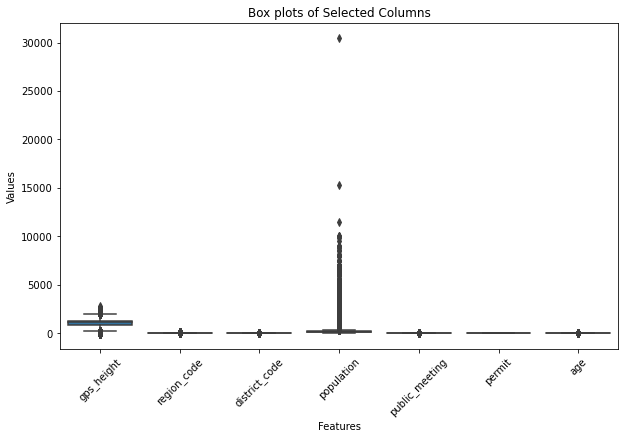

In [80]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_concise.iloc[:,1:])
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

### Removing outliers of pop, IMP...

In [81]:
df_concise.describe()

,id,gps_height,region_code,district_code,population,public_meeting,permit,age
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,1069.831684,15.297003,5.630135,240.880101,0.914899,0.705522,26.074798
std,21453.128371,501.077319,17.587406,9.633442,452.950368,0.279034,0.455812,10.179591
min,0.000000,-90.000000,1.000000,1.000000,2.000000,0.000000,0.000000,11.000000
25%,18519.750000,903.000000,5.000000,2.000000,100.000000,1.000000,0.000000,20.000000
50%,37061.500000,1167.000000,12.000000,3.000000,150.000000,1.000000,1.000000,24.000000
75%,55656.500000,1319.250000,17.000000,5.000000,215.000000,1.000000,1.000000,28.000000
max,74247.000000,2770.000000,99.000000,80.000000,30500.000000,1.000000,1.000000,64.000000


In [82]:
df_selected_outliers = df_concise[['population']]


# Calculate IQR for selected columns
Q1 = df_selected_outliers.quantile(0.25)
Q3 = df_selected_outliers.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df_selected_outliers< lower_bound) | (df_selected_outliers > upper_bound)).any(axis=1)

# Print indices of outliers
outlier_indices = df.index[outliers]

In [83]:
# droping all rows with outliers 
df_concise_without_outliers = df_concise.drop(outlier_indices)
df_concise.info(),df_concise_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   gps_height             59400 non-null  float64
 2   basin                  59400 non-null  object 
 3   region_code            59400 non-null  int64  
 4   district_code          59400 non-null  float64
 5   lga                    59400 non-null  object 
 6   population             59400 non-null  float64
 7   public_meeting         59400 non-null  float64
 8   permit                 59400 non-null  float64
 9   extraction_type_class  59400 non-null  object 
 10  management_group       59400 non-null  object 
 11  payment_type           59400 non-null  object 
 12  quality_group          59400 non-null  object 
 13  quantity_group         59400 non-null  object 
 14  source_type            59400 non-null  object 
 15  so

(None, None)

Now we have clean data

# Data Preprocessing

## Declaring Target and Features


In [84]:
df_concise.columns

Index(['id', 'gps_height', 'basin', 'region_code', 'district_code', 'lga',
       'population', 'public_meeting', 'permit', 'extraction_type_class',
       'management_group', 'payment_type', 'quality_group', 'quantity_group',
       'source_type', 'source_class', 'waterpoint_type_group', 'status_group',
       'age'],
      dtype='object')

In [85]:
X_1 = df_concise.drop(['status_group', 'id'], axis=1)
X_2 = df_concise_without_outliers.drop(['status_group','id'], axis=1)

y_1 = df_concise['status_group']
y_2 = df_concise_without_outliers['status_group']


In [86]:
# saving the ID's for prediction later
ids_with_outliers = df_concise['id']
ids_without_outliers = df_concise_without_outliers['id']

### Expound on the meanings of 1 and 2

**Split data into separate training and test set** 

In [87]:
# split X and y into training and testing sets
#dataset with outliers
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.2, random_state = 42)

#dataset without outliers
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 42)


In [88]:
# check the shapes of X_train and X_test

X_train_1.shape, X_test_1.shape,     X_train_2.shape, X_test_2.shape

((47520, 17), (11880, 17), (41374, 17), (10344, 17))

## Dealing with Categorical Varibles

In [89]:
X_train_1.columns, X_train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41374 entries, 15616 to 18124
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             41374 non-null  float64
 1   basin                  41374 non-null  object 
 2   region_code            41374 non-null  int64  
 3   district_code          41374 non-null  float64
 4   lga                    41374 non-null  object 
 5   population             41374 non-null  float64
 6   public_meeting         41374 non-null  float64
 7   permit                 41374 non-null  float64
 8   extraction_type_class  41374 non-null  object 
 9   management_group       41374 non-null  object 
 10  payment_type           41374 non-null  object 
 11  quality_group          41374 non-null  object 
 12  quantity_group         41374 non-null  object 
 13  source_type            41374 non-null  object 
 14  source_class           41374 non-null  object 
 15

(Index(['gps_height', 'basin', 'region_code', 'district_code', 'lga',
        'population', 'public_meeting', 'permit', 'extraction_type_class',
        'management_group', 'payment_type', 'quality_group', 'quantity_group',
        'source_type', 'source_class', 'waterpoint_type_group', 'age'],
       dtype='object'),
 None)

selecting all Categorical variables 

In [90]:

X_train_1_categorical = X_train_1[['basin','region_code','district_code','lga',
                                  'extraction_type_class','management_group','payment_type', 'quality_group',
                                  'quantity_group', 'source_type','source_class','waterpoint_type_group']]
X_train_2_categorical =  X_train_2[['basin','region_code','district_code','lga',
                                  'extraction_type_class','management_group','payment_type', 'quality_group',
                                  'quantity_group', 'source_type','source_class','waterpoint_type_group']]

X_train_1_categorical.head()

,basin,region_code,district_code,lga,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_type,source_class,waterpoint_type_group
3607,Internal,21,1.0,Babati,gravity,user-group,per bucket,good,insufficient,spring,groundwater,communal standpipe
50870,Internal,1,6.0,Bahi,handpump,user-group,never pay,good,enough,shallow well,groundwater,hand pump
20413,Lake Rukwa,12,6.0,Mbozi,other,user-group,never pay,good,enough,shallow well,groundwater,other
52806,Rufiji,12,7.0,Mbarali,gravity,user-group,monthly,good,insufficient,river/lake,surface,communal standpipe
50091,Wami / Ruvu,5,1.0,Kilosa,other,user-group,on failure,salty,enough,shallow well,groundwater,other


we shall add `permit` and `public_meeting` later during scaling since they are numerical 

In [91]:
len(X_train_1_categorical.columns)==len(X_train_2_categorical.columns)

True

## One-Hot Encoding and Scaling

### One-Hot Encoding

To handle categorical features, we apply One-Hot Encoding. This method transforms categorical variables into a set of binary columns, making them suitable for machine learning algorithms. This step is crucial for ensuring that categorical variables are properly represented in the model.

### Scaling

We use **Min-Max Scaling** to normalize features. This technique scales the data to a range of [0, 1], which is particularly useful because:

- **Feature Scaling**: Not all features in the dataset are normalized, and Min-Max Scaling ensures that features are on a similar scale.
- **Categorical Data**: Scaling is essential when dealing with categorical data converted into binary format through One-Hot Encoding.

By applying Min-Max Scaling, we ensure that all features contribute equally to the model, improving performance and convergence during training.


## One Hot Encoding

In [92]:
ohe = OneHotEncoder(handle_unknown="ignore",drop='first')

In [93]:


X_train_categorical_ohe = ohe.fit_transform(X_train_1_categorical).toarray()

X_train_1_encoded_categorical = pd.DataFrame(
    X_train_categorical_ohe,
    columns=ohe.get_feature_names_out(X_train_1_categorical.columns)
)
X_train_1_encoded_categorical.shape

(47520, 214)

In [94]:

X_train_2_categorical_ohe = ohe.fit_transform(X_train_2_categorical).toarray()

X_train_2_encoded_categorical = pd.DataFrame(
    X_train_2_categorical_ohe,
    columns=ohe.get_feature_names_out(X_train_2_categorical.columns)
)
X_train_2_encoded_categorical.shape

(41374, 213)

As can be seen above some columns in the dataset without outliers have some missing columns, we shall look for the missing column and add it to the dataset 2 

In [95]:
#identify missing columns
missing_columns = set(X_train_1_encoded_categorical.columns) - set(X_train_2_encoded_categorical.columns)

#add column
for col in missing_columns:
     X_train_2_encoded_categorical[col]= 0

#check shape
X_train_2_encoded_categorical.shape




(41374, 214)

 **Feature Scaling**

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

selecting all Categorical variables 

In [96]:
['gps_height','population','age']
X_train_1_numerical = X_train_1[['gps_height','population','age','permit','public_meeting']]
X_train_2_numerical =  X_train_2[['gps_height','population','age','permit','public_meeting']]

X_train_1_numerical.head()

,gps_height,population,age,permit,public_meeting
3607,2092.0,160.0,26.0,1.0,1.0
50870,1167.0,150.0,24.0,1.0,1.0
20413,1167.0,150.0,24.0,0.0,1.0
52806,1167.0,150.0,24.0,1.0,1.0
50091,1023.0,120.0,27.0,1.0,1.0


MinMax Scaling


In [97]:
scaler = MinMaxScaler()

In [98]:
#dataset with outliers
scaler.fit(X_train_1_numerical)
X_train_1_numeric_scaled = pd.DataFrame(
    scaler.transform(X_train_1_numerical),
    # index is important to ensure we can concatenate with other columns
    index=X_train_1_numerical.index,
    columns=X_train_1_numerical.columns
)
X_train_1_numeric_scaled




,gps_height,population,age,permit,public_meeting
3607,0.760678,0.005181,0.283019,1.0,1.0
50870,0.434169,0.004853,0.245283,1.0,1.0
20413,0.434169,0.004853,0.245283,0.0,1.0
52806,0.434169,0.004853,0.245283,1.0,1.0
50091,0.383339,0.003869,0.301887,1.0,1.0
...,...,...,...,...,...
54343,0.137663,0.008296,0.339623,1.0,1.0
38158,0.637487,0.001082,0.471698,0.0,1.0
860,0.017649,0.032723,0.150943,0.0,0.0
15795,0.434169,0.004853,0.245283,1.0,1.0


In [99]:
#dataset without outliers

scaler.fit(X_train_2_numerical)
X_train_2_numeric_scaled = pd.DataFrame(
    scaler.transform(X_train_2_numerical),
    # index is important to ensure we can concatenate with other columns
    index=X_train_2_numerical.index,
    columns=X_train_2_numerical.columns
)
X_train_2_numeric_scaled

,gps_height,population,age,permit,public_meeting
15616,0.419696,0.124675,0.547170,1.0,1.0
11025,0.458172,0.150649,0.018868,1.0,1.0
10831,0.624073,0.202597,0.075472,0.0,1.0
6662,0.522061,0.098701,0.735849,1.0,0.0
41180,0.121073,0.670130,0.622642,1.0,1.0
...,...,...,...,...,...
12952,0.619132,0.774026,0.245283,1.0,1.0
51363,0.369926,0.774026,0.660377,1.0,1.0
43838,0.434169,0.384416,0.245283,1.0,1.0
981,0.109778,0.514286,0.396226,1.0,1.0


## Concatenating onehot encoded and scaled columns

In [100]:
# Reset the index of both DataFrames
X_train_1_numeric_scaled = X_train_1_numeric_scaled.reset_index(drop=True)
X_train_1_encoded_categorical = X_train_1_encoded_categorical.reset_index(drop=True)

In [101]:
# Reset the index of both DataFrames
X_train_2_numeric_scaled = X_train_2_numeric_scaled.reset_index(drop=True)
X_train_2_encoded_categorical = X_train_2_encoded_categorical.reset_index(drop=True)

In [102]:

X_train_1_full = pd.concat([X_train_1_encoded_categorical, X_train_1_numeric_scaled], axis=1)
X_train_1 = X_train_1_full

In [103]:
X_train_2_full = pd.concat([X_train_2_encoded_categorical, X_train_2_numeric_scaled], axis=1)
X_train_2 = X_train_2_full

## Data Prepreprocessing on the test set

In [104]:

X_test_1_categorical = X_test_1[['basin','region_code','district_code','lga',
                                  'extraction_type_class','management_group','payment_type', 'quality_group',
                                  'quantity_group', 'source_type','source_class','waterpoint_type_group']]
X_test_2_categorical =  X_test_2[['basin','region_code','district_code','lga',
                                  'extraction_type_class','management_group','payment_type', 'quality_group',
                                  'quantity_group', 'source_type','source_class','waterpoint_type_group']]

X_test_categorical_ohe = ohe.fit_transform(X_test_1_categorical).toarray()

X_test_1_encoded_categorical = pd.DataFrame(
    X_test_categorical_ohe,
    columns=ohe.get_feature_names_out(X_test_1_categorical.columns)
)
X_test_1_encoded_categorical


# add missing columns, if any

#identify missing columns
missing_columns = set(X_train_1_encoded_categorical.columns) - set(X_test_1_encoded_categorical.columns)

#add column
for col in missing_columns:
     X_test_1_encoded_categorical[col]= 0

#check shape
X_test_1_encoded_categorical.shape



X_test_2_categorical_ohe = ohe.fit_transform(X_test_2_categorical).toarray()

X_test_2_encoded_categorical = pd.DataFrame(
    X_test_2_categorical_ohe,
    columns=ohe.get_feature_names_out(X_test_2_categorical.columns)
)
X_test_2_encoded_categorical


# add missing columns, if any

#identify missing columns
missing_columns = set(X_train_1_encoded_categorical.columns) - set(X_test_2_encoded_categorical.columns)

#add column
for col in missing_columns:
     X_test_2_encoded_categorical[col]= 0

#check shape
X_test_2_encoded_categorical.shape



X_test_1_numerical = X_test_1[['gps_height','population','age','permit','public_meeting']]
X_test_2_numerical =  X_test_2[['gps_height','population','age','permit','public_meeting']]


#dataset with outliers
scaler.fit(X_test_1_numerical)
X_test_1_numeric_scaled = pd.DataFrame(
    scaler.transform(X_test_1_numerical),
    # index is important to ensure we can concatenate with other columns
    index=X_test_1_numerical.index,
    columns=X_test_1_numerical.columns
)
X_test_1_numeric_scaled


#dataset without outliers

scaler.fit(X_test_2_numerical)
X_test_2_numeric_scaled = pd.DataFrame(
    scaler.transform(X_test_2_numerical),
    # index is important to ensure we can concatenate with other columns
    index=X_test_2_numerical.index,
    columns=X_test_2_numerical.columns
)
X_test_2_numeric_scaled

# Reset the index of both DataFrames
X_test_1_numeric_scaled = X_test_1_numeric_scaled.reset_index(drop=True)
X_test_1_encoded_categorical = X_test_1_encoded_categorical.reset_index(drop=True)

# Reset the index of both DataFrames
X_test_2_numeric_scaled = X_test_2_numeric_scaled.reset_index(drop=True)
X_test_2_encoded_categorical = X_test_2_encoded_categorical.reset_index(drop=True)


X_test_1_full = pd.concat([X_test_1_encoded_categorical, X_test_1_numeric_scaled], axis=1)
X_test_1 = X_test_1_full

X_test_2_full = pd.concat([X_test_2_encoded_categorical, X_test_2_numeric_scaled], axis=1)
X_test_2 = X_test_2_full

In [105]:
df_concise['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

## Encoding the Labels

In [106]:
# encoding the labels


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training target labels

# train dataset
y_train_1_encoded = label_encoder.fit_transform(y_train_1)
y_train_2_encoded = label_encoder.fit_transform(y_train_2)

# test dataset
y_test_1_encoded = label_encoder.transform(y_test_1)
y_test_2_encoded = label_encoder.transform(y_test_2)


In [107]:
#convert labels back to series from array

# Convert encoded target back to Series
#train dataset
y_train_1 = pd.Series(y_train_1_encoded, name='Status')
y_train_2 = pd.Series(y_train_2_encoded, name='Status')

#test dataset
y_test_1 = pd.Series(y_test_1_encoded, name='Status')
y_test_2 = pd.Series(y_test_2_encoded, name='Status')



In [108]:
print(label_encoder.classes_) 

['functional' 'functional needs repair' 'non functional']


Thus 

0 - functional

1 - functional needs repair

2 - non functional

# **5. MODELING AND EVALUATION**

## Introduction

In this section, we will develop and evaluate baseline models for two machine learning algorithms: Decision Trees and Logistic Regression. Our goal is to establish a starting point with these models and then refine them based on performance metrics.

### Baseline Models

1. **Decision Tree Classifier**: 
   - **Purpose**: The Decision Tree model will help us understand the initial performance of a non-linear model, which is capable of capturing complex relationships in the data.
   - **Data**: We will use two datasets: one with outliers and one without outliers to assess the impact of outliers on model performance.

2. **Logistic Regression**:
   - **Purpose**: The Logistic Regression model will provide a baseline for a linear approach, suitable for evaluating how well a simpler model performs compared to more complex models.
   - **Data**: Similar to the Decision Tree, we will evaluate Logistic Regression on both datasets (with and without outliers).

### Data Sets

- **Dataset with Outliers**: Contains potential anomalies which may impact the performance of the models.
- **Dataset without Outliers**: Outliers have been removed to assess how they influence the model performance.

### Evaluation Metrics

To effectively identify pumps needing repair or that are not operational, we will evaluate our models using the following metrics, focusing on both macro and weighted averages:

- **Recall**: Measures how well the model identifies all relevant instances, specifically pumps that need repair (label 1) and those that are non-operational (label 2). High recall is critical to ensure we capture all maintenance needs, helping the government of Tanzania address pump issues promptly.

- **Precision**: Assesses how many of the identified maintenance needs are correct. High precision ensures that maintenance resources are used efficiently by minimizing false positives, where functional pumps are incorrectly flagged for maintenance.

- **F1 Score**: Combines precision and recall into a single metric, balancing both to provide a comprehensive view of model performance. It is especially useful in evaluating how well the model identifies both repair needs and non-operational pumps while considering both false positives and false negatives.

### Macro and Weighted Averages

- **Macro Average**: Calculates metrics for each class independently and averages them. This approach evaluates the model’s performance across all classes equally, giving insight into how well it handles each type of pump—functional, needing repair, and non-operational.

- **Weighted Average**: Takes into account the number of instances in each class, providing a performance measure that reflects class imbalances. This metric is important for understanding how well the model performs with less frequent classes (repair-needed and non-operational pumps), ensuring a balanced evaluation.

By analyzing both macro and weighted averages of recall, precision, and F1 Score, we ensure a thorough assessment of the model's ability to identify pumps needing maintenance and make informed decisions for resource allocation and maintenance planning.


### Model Improvement

After establishing baseline performance, we will refine the models by:

- **Tuning Hyperparameters**: Adjusting model settings to enhance performance.
- **Handling Class Imbalance**: Applying techniques such as SMOTE and class weights to address imbalances in the dataset.

### Objective

Our objective is to identify the best model for our stakeholder, the government of Tanzania, focusing on efficient maintenance across the country. By evaluating the models thoroughly and improving them based on the metrics, we aim to choose the model that best meets the needs of capturing pumps that are non-functional and those needing repair.


-Before modeling we ensure all train and test feature data frames have the same order of columns

In [109]:
columns = X_train_1.columns
#reordering all columns for uniformity
X_train_2 = X_train_2[columns]
X_test_1 = X_test_1[columns]
X_test_2 = X_test_2[columns]

In [110]:
y_train_1.value_counts()

0    25802
2    18252
1     3466
Name: Status, dtype: int64

In [111]:
y_test_1.value_counts()

0    6457
2    4572
1     851
Name: Status, dtype: int64

In [112]:
y_test_2.value_counts()

0    5632
2    4011
1     701
Name: Status, dtype: int64

Data is in order hence we begin

## **A. Logistic Regression**

### I.Baseline model( Default Hyperparameters)

#### 1. Model with Outliers

In [113]:
# Instantiate the model
logreg = LogisticRegression(random_state= 42)


# Fit the model on the scaled data
model = logreg.fit(X_train_1, y_train_1)
# Predict
y_hat_test = logreg.predict(X_test_1)

   
    # Compute metrics with 'macro' average
model_recall_macro = recall_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
model_precision_macro = precision_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
model_f1_macro = f1_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
    
    # Compute metrics with 'weighted' average
model_recall_weighted = recall_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
model_precision_weighted = precision_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
model_f1_weighted = f1_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
    
    # Print results
print(f"Macro Recall: {model_recall_macro:.4f}")
print(f"Macro Precision: {model_precision_macro:.4f}")
print(f"Macro F1 Score: {model_f1_macro:.4f}")
    
print(f"Weighted Recall: {model_recall_weighted:.4f}")
print(f"Weighted Precision: {model_precision_weighted:.4f}")
print(f"Weighted F1 Score: {model_f1_weighted:.4f}")
print('-' * 40)

/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Macro Recall: 0.5534
Macro Precision: 0.6833
Macro F1 Score: 0.5694
Weighted Recall: 0.7444
Weighted Precision: 0.7390
Weighted F1 Score: 0.7241
----------------------------------------


#### 2. Model without Outliers

In [114]:
# Replace None with appropriate code
# Instantiate the model
logreg = LogisticRegression(random_state= 42)


# Fit the model on the scaled data
model = logreg.fit(X_train_2, y_train_2)

# Predict
y_hat_test = logreg.predict(X_test_2)

    
    # Compute metrics with 'macro' average
model_recall_macro = recall_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
model_precision_macro = precision_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
model_f1_macro = f1_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
    
    # Compute metrics with 'weighted' average
model_recall_weighted = recall_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
model_precision_weighted = precision_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
model_f1_weighted = f1_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
    
    # Print results
print(f"Macro Recall: {model_recall_macro:.4f}")
print(f"Macro Precision: {model_precision_macro:.4f}")
print(f"Macro F1 Score: {model_f1_macro:.4f}")
    
print(f"Weighted Recall: {model_recall_weighted:.4f}")
print(f"Weighted Precision: {model_precision_weighted:.4f}")
print(f"Weighted F1 Score: {model_f1_weighted:.4f}")
print('-' * 40)



Macro Recall: 0.5478
Macro Precision: 0.6726
Macro F1 Score: 0.5576
Weighted Recall: 0.7509
Weighted Precision: 0.7412
Weighted F1 Score: 0.7297
----------------------------------------


/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Baseline Model Analysis

### Logistic Regression (With Outliers)

**Metrics:**
- **Macro Recall:** 0.5534
- **Macro Precision:** 0.6833
- **Macro F1 Score:** 0.5694
- **Weighted Recall:** 0.7444
- **Weighted Precision:** 0.7390
- **Weighted F1 Score:** 0.7241

**Key Points:**
- **Moderate Recall** indicates decent identification of relevant instances.
- **High Precision** suggests accurate positive predictions.
- **Good F1 Score** balances recall and precision.

**Note:** Convergence warning suggests optimization issues.

### Logistic Regression (Without Outliers)

**Metrics:**
- **Macro Recall:** 0.5478
- **Macro Precision:** 0.6726
- **Macro F1 Score:** 0.5576
- **Weighted Recall:** 0.7509
- **Weighted Precision:** 0.7412
- **Weighted F1 Score:** 0.7297

**Key Points:**
- **Slight Decrease in Recall** but remains acceptable.
- **Slight Improvements** in Precision and F1 Score.

**Note:** Similar convergence issues as with outliers.

### Summary

Both models perform well but show convergence issues. Adjusting hyperparameters or scaling the data may improve results.


## Model Tuning

### Background
To enhance the performance of our logistic regression model, we will focus on tuning the model using the dataset that includes outliers. This approach helps in optimizing the model without the added complexity of redundant data.

### Approach

I. **Addressing Class Imbalance:**
   - **Class Weights:** We will experiment with different class weights to handle imbalance directly within the model.
   - **SMOTE (Synthetic Minority Over-sampling Technique):** We will use SMOTE to balance the class distribution by generating synthetic samples for the minority class.
   

II. **Regularization:**
   - **L1 Regularization:** Testing L1 regularization to promote sparsity by driving some coefficients to zero.
   - **L2 Regularization:** Testing L2 regularization to penalize large coefficients, thereby reducing model overfitting.

By addressing class imbalance and applying regularization techniques, we aim to improve the model's performance and generalizability.


## I.  Addressing Class Imbalance

In [115]:
#
y_train_1.value_counts()

0    25802
2    18252
1     3466
Name: Status, dtype: int64

-    As can be seen class 1 and 2 are minority classes

### A. Using Class Weights

In [116]:
# Define class weights based on your specific classes
weights = [None, 'balanced', {0: 1, 1: 2, 2: 1}, {0: 1, 1: 10, 2: 1}, ]
names = ['None', 'Balanced', '2:1', '10:1']

# Loop through different weights and evaluate the model
for n, weight in enumerate(weights):
    print(f"Testing with class weight: {names[n]}")
    
    # Fit a model
    logreg = LogisticRegression(class_weight=weight, random_state=42,solver= 'saga')
    model_log = logreg.fit(X_train_1, y_train_1)
    
    # Predict
    y_hat_test = logreg.predict(X_test_1)
    
    # Compute metrics with 'macro' average
    model_recall_macro = recall_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
    model_precision_macro = precision_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
    model_f1_macro = f1_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
    
    # Compute metrics with 'weighted' average
    model_recall_weighted = recall_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
    model_precision_weighted = precision_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
    model_f1_weighted = f1_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
    
    # Print results
    print(f"Macro Recall: {model_recall_macro:.4f}")
    print(f"Macro Precision: {model_precision_macro:.4f}")
    print(f"Macro F1 Score: {model_f1_macro:.4f}")
    
    print(f"Weighted Recall: {model_recall_weighted:.4f}")
    print(f"Weighted Precision: {model_precision_weighted:.4f}")
    print(f"Weighted F1 Score: {model_f1_weighted:.4f}")
    print('-' * 40)


Testing with class weight: None
Macro Recall: 0.5495
Macro Precision: 0.6789
Macro F1 Score: 0.5639
Weighted Recall: 0.7439
Weighted Precision: 0.7384
Weighted F1 Score: 0.7226
----------------------------------------
Testing with class weight: Balanced


/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Macro Recall: 0.6506
Macro Precision: 0.5963
Macro F1 Score: 0.5691
Weighted Recall: 0.6400
Weighted Precision: 0.7523
Weighted F1 Score: 0.6768
----------------------------------------
Testing with class weight: 2:1
Macro Recall: 0.5956
Macro Precision: 0.6344
Macro F1 Score: 0.6078
Weighted Recall: 0.7364
Weighted Precision: 0.7379
Weighted F1 Score: 0.7290
----------------------------------------
Testing with class weight: 10:1
Macro Recall: 0.5365
Macro Precision: 0.5812
Macro F1 Score: 0.3800
Weighted Recall: 0.3689
Weighted Precision: 0.7634
Weighted F1 Score: 0.4421
----------------------------------------


/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Recommended Class Weight
**Balanced** class weight is recommended as it provides the highest macro recall (0.6506), ensuring the best identification of pumps needing repair or non-functional while maintaining reasonable precision and F1 score.

### Conclusion
The **balanced** class weight best meets the stakeholder's needs for efficient maintenance, with further tuning to follow.

### B.  Using SMOTE(Synthetic Minority Over-sampling Technique)

In [117]:
smote = SMOTE(random_state= 42)
X_train_1_resampled, y_train_1_resampled = smote.fit_resample(X_train_1, y_train_1) 
# Fit a model
logreg = LogisticRegression(random_state=42,solver= 'saga')
model_log = logreg.fit(X_train_1_resampled, y_train_1_resampled)
print(model_log)

# Predict
y_hat_test = logreg.predict(X_test_1)
# Compute metrics with 'macro' average
model_recall_macro = recall_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
model_precision_macro = precision_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
model_f1_macro = f1_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
    
# Compute metrics with 'weighted' average
model_recall_weighted = recall_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
model_precision_weighted = precision_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
model_f1_weighted = f1_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
    
# Print results
print(f"Macro Recall: {model_recall_macro:.4f}")
print(f"Macro Precision: {model_precision_macro:.4f}")
print(f"Macro F1 Score: {model_f1_macro:.4f}")
    
print(f"Weighted Recall: {model_recall_weighted:.4f}")
print(f"Weighted Precision: {model_precision_weighted:.4f}")
print(f"Weighted F1 Score: {model_f1_weighted:.4f}")

LogisticRegression(random_state=42, solver='saga')
Macro Recall: 0.6648
Macro Precision: 0.5985
Macro F1 Score: 0.5738
Weighted Recall: 0.6397
Weighted Precision: 0.7537
Weighted F1 Score: 0.6767


## Comparison of SMOTE and 'class_weight' techniques

Given the context of working with the government of Tanzania, where the primary goal is to carry out efficient maintenance across the country, the following metrics are of priority: recall, precision, and F1 score. The aim is to accurately capture pumps that are not functional (label 2) and those needing repair (label 1), while ensuring the model performs well overall.

### Results

- **Class Weight Balanced:**
  - **Macro Recall:** 0.6506
  - **Macro Precision:** 0.5963
  - **Macro F1 Score:** 0.5691
  - **Weighted Recall:** 0.6400
  - **Weighted Precision:** 0.7523
  - **Weighted F1 Score:** 0.6768

- **SMOTE (random state = 42):**
  - **Macro Recall:** 0.6648
  - **Macro Precision:** 0.5985
  - **Macro F1 Score:** 0.5738
  - **Weighted Recall:** 0.6397
  - **Weighted Precision:** 0.7537
  - **Weighted F1 Score:** 0.6767

### Justification

Based on the results, **SMOTE** is selected for the following reasons:

1. **Improved Macro Recall**: SMOTE provides a higher Macro Recall (0.6648) compared to class weight balancing (0.6506). This means SMOTE is better at identifying less frequent classes, which is crucial for capturing non-functional and repair-needed pumps.

2. **Comparable Precision and F1 Score**: SMOTE’s Macro Precision (0.5985) is slightly lower than class weight balancing (0.5963), but it maintains a competitive F1 Score (0.5738 vs. 0.5691). This indicates a balanced performance between precision and recall, which is important for the reliability of maintenance decisions.

3. **Practical Benefits**: SMOTE helps mitigate the issue of class imbalance by generating synthetic samples, improving the model’s ability to learn from minority classes. This is beneficial for scenarios where identifying malfunctioning and repair-needed pumps is critical.

In conclusion, **SMOTE** offers a better balance in recall while maintaining competitive precision and F1 Score, making it more suitable for the government's maintenance needs.


- From henceforth, we shall apply SMOTE.

## II.  Addressing Regularization

-   We shall test for l1 and l2 regularization 

In [118]:
# Define the regularization types and corresponding parameter values
penalties = ['l1', 'l2']
names = ['L1 Regularization', 'L2 Regularization']

# Loop through different penalties and evaluate the model
for n, penalty in enumerate(penalties):
    print(f"Testing with penalty: {names[n]}")


    smote = SMOTE(random_state=42)
    X_train_1_resampled, y_train_1_resampled = smote.fit_resample(X_train_1, y_train_1) 
    # Fit a model
    logreg = LogisticRegression(penalty=penalty,random_state=42,solver= 'saga')
    model_log = logreg.fit(X_train_1_resampled, y_train_1_resampled)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_test_1)
        
    
    
    # Compute metrics with 'macro' average
    model_recall_macro = recall_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
    model_precision_macro = precision_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
    model_f1_macro = f1_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
    
    # Compute metrics with 'weighted' average
    model_recall_weighted = recall_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
    model_precision_weighted = precision_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
    model_f1_weighted = f1_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
    
    # Print results
    print(f"Macro Recall: {model_recall_macro:.4f}")
    print(f"Macro Precision: {model_precision_macro:.4f}")
    print(f"Macro F1 Score: {model_f1_macro:.4f}")
    
    print(f"Weighted Recall: {model_recall_weighted:.4f}")
    print(f"Weighted Precision: {model_precision_weighted:.4f}")
    print(f"Weighted F1 Score: {model_f1_weighted:.4f}")
    print('-' * 40)


Testing with penalty: L1 Regularization


/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', random_state=42, solver='saga')
Macro Recall: 0.6646
Macro Precision: 0.5986
Macro F1 Score: 0.5726
Weighted Recall: 0.6381
Weighted Precision: 0.7538
Weighted F1 Score: 0.6755
----------------------------------------
Testing with penalty: L2 Regularization
LogisticRegression(random_state=42, solver='saga')
Macro Recall: 0.6648
Macro Precision: 0.5985
Macro F1 Score: 0.5738
Weighted Recall: 0.6397
Weighted Precision: 0.7537
Weighted F1 Score: 0.6767
----------------------------------------


### Justification for Model Parameters

The performance metrics for the Logistic Regression model with SMOTE and L2 regularization are identical to those obtained using SMOTE alone. This indicates that:

- **No Significant Improvement:** The addition of L2 regularization does not impact the model's performance, as all metrics remain mostly unchanged.
- **Simpler Model:** Without regularization, the model is simpler and computationally less expensive.
- **Focus on Class Imbalance:** SMOTE effectively addresses class imbalance, which is the primary concern. Further tuning should focus on other techniqueslike decision trees if needed.

Thus, adding L2 regularization does not provide additional benefit in this context.



## **B. Decision Trees**

### Baseline model( Default Hyperparameters)

### 1. Model with Outliers

In [119]:
dt = DecisionTreeClassifier(random_state= 42)
model = dt.fit(X_train_1, y_train_1)
 #Predict
y_hat_test = dt.predict(X_test_1)
    # Compute metrics with 'macro' average
model_recall_macro = recall_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
model_precision_macro = precision_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
model_f1_macro = f1_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
    
    # Compute metrics with 'weighted' average
model_recall_weighted = recall_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
model_precision_weighted = precision_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
model_f1_weighted = f1_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
    
    # Print results
print(f"Macro Recall: {model_recall_macro:.4f}")
print(f"Macro Precision: {model_precision_macro:.4f}")
print(f"Macro F1 Score: {model_f1_macro:.4f}")
    
print(f"Weighted Recall: {model_recall_weighted:.4f}")
print(f"Weighted Precision: {model_precision_weighted:.4f}")
print(f"Weighted F1 Score: {model_f1_weighted:.4f}")
print('-' * 40)

Macro Recall: 0.5625
Macro Precision: 0.5647
Macro F1 Score: 0.5633
Weighted Recall: 0.6834
Weighted Precision: 0.6831
Weighted F1 Score: 0.6829
----------------------------------------


In [120]:
 #Predict
y_hat_test = dt.predict(X_test_1)

### 2. Model without Outliers

In [121]:


# Fit the model on the scaled data
model = dt.fit(X_train_2, y_train_2)
# Predict
y_hat_test = dt.predict(X_test_2)
    # Compute metrics with 'macro' average
model_recall_macro = recall_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
model_precision_macro = precision_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
model_f1_macro = f1_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
    
    # Compute metrics with 'weighted' average
model_recall_weighted = recall_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
model_precision_weighted = precision_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
model_f1_weighted = f1_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
    
    # Print results
print(f"Macro Recall: {model_recall_macro:.4f}")
print(f"Macro Precision: {model_precision_macro:.4f}")
print(f"Macro F1 Score: {model_f1_macro:.4f}")
    
print(f"Weighted Recall: {model_recall_weighted:.4f}")
print(f"Weighted Precision: {model_precision_weighted:.4f}")
print(f"Weighted F1 Score: {model_f1_weighted:.4f}")
print('-' * 40)


Macro Recall: 0.6054
Macro Precision: 0.6157
Macro F1 Score: 0.6101
Weighted Recall: 0.7362
Weighted Precision: 0.7329
Weighted F1 Score: 0.7342
----------------------------------------


## Baseline Model Analysis

### Decision Tree (With Outliers)

**Metrics:**
- **Macro Recall:** 0.5625
- **Macro Precision:** 0.5647
- **Macro F1 Score:** 0.5633
- **Weighted Recall:** 0.6834
- **Weighted Precision:** 0.6831
- **Weighted F1 Score:** 0.6829

**Key Points:**
- **Moderate Recall** reflects a reasonable identification of relevant instances, though there is room for improvement.
- **Moderate Precision** shows a balanced rate of correct positive predictions.
- **Good F1 Score** indicates a decent overall performance, balancing recall and precision effectively.

### Decision Tree (Without Outliers)

**Metrics:**
- **Macro Recall:** 0.6054
- **Macro Precision:** 0.6157
- **Macro F1 Score:** 0.6101
- **Weighted Recall:** 0.7362
- **Weighted Precision:** 0.7329
- **Weighted F1 Score:** 0.7342

**Key Points:**
- **Improved Recall** compared to the model with outliers, indicating better identification of relevant instances.
- **Increased Precision** and **F1 Score** suggest overall better performance and balance.

### Summary

The Decision Tree model without outliers shows improved recall, precision, and F1 Score compared to the model with outliers. Both models perform well, but the absence of outliers leads to better overall metrics. Further tuning may enhance performance.


## Model Tuning

### Background
To enhance the performance of our Decision Tree model, we will focus on tuning the model using the dataset that includes outliers. This approach allows us to optimize the model while considering its ability to handle complex decision boundaries.

### Approach

I. **Tuning Criteria:**
   - **Gini Index:** We will test the Gini Index criterion to evaluate how well it splits the data based on impurity measures. This is a standard criterion for decision trees that measures node impurity.
   - **Entropy:** We will also test the Entropy criterion, which measures impurity based on information gain. This can provide a different perspective on how the data is split.

II. **Max Depth:**
   - **Max Depth of the Tree:** We will experiment with different maximum depths of the tree to control its complexity. Limiting the depth helps prevent overfitting by ensuring the tree does not become too complex.

By tuning these parameters, we aim to find the best configuration for our Decision Tree model, enhancing its performance and ensuring it generalizes well to unseen data.


## I. Tuning Criteria

-   We shall try gini and entropy

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE

# Define the criteria and corresponding names
criteria = ['gini', 'entropy']
names = ['Gini', 'Entropy']

# Loop through different criteria and evaluate the model
for n, criterion in enumerate(criteria):
    print(f"Testing with criterion: {names[n]}")

    # Resample the data using SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_1, y_train_1) 

    # Fit a model
    dt = DecisionTreeClassifier(criterion=criterion, random_state=42)
    model_dt = dt.fit(X_train_resampled, y_train_resampled)
    print(model_dt)

    # Predict
    y_hat_test = dt.predict(X_test_1)
    
    # Compute metrics with 'macro' average
    model_recall_macro = recall_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
    model_precision_macro = precision_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
    model_f1_macro = f1_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
    
    # Compute metrics with 'weighted' average
    model_recall_weighted = recall_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
    model_precision_weighted = precision_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
    model_f1_weighted = f1_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
    
    # Print results# Predict
    y_hat_test = dt.predict(X_test_2)
    
    print(f"Weighted Recall: {model_recall_weighted:.4f}")
    print(f"Weighted Precision: {model_precision_weighted:.4f}")
    print(f"Weighted F1 Score: {model_f1_weighted:.4f}")
    print('-' * 40)


Testing with criterion: Gini
DecisionTreeClassifier(random_state=42)
Weighted Recall: 0.6819
Weighted Precision: 0.7186
Weighted F1 Score: 0.6962
----------------------------------------
Testing with criterion: Entropy
DecisionTreeClassifier(criterion='entropy', random_state=42)
Weighted Recall: 0.6738
Weighted Precision: 0.7111
Weighted F1 Score: 0.6886
----------------------------------------


### Tuning Criteria: Decision Tree

### Performance Comparison

**Criterion: Gini**
- **Macro Recall:** 0.6232
- **Macro Precision:** 0.5829
- **Macro F1 Score:** 0.5886
- **Weighted Recall:** 0.6819
- **Weighted Precision:** 0.7186
- **Weighted F1 Score:** 0.6962

**Criterion: Entropy**
- **Macro Recall:** 0.6121
- **Macro Precision:** 0.5736
- **Macro F1 Score:** 0.5790
- **Weighted Recall:** 0.6738
- **Weighted Precision:** 0.7111
- **Weighted F1 Score:** 0.6886

### Summary

The Decision Tree model using the **Gini** criterion outperforms the model using **Entropy** across all key metrics:
- **Higher Macro Recall** and **Weighted Recall** with Gini indicate better overall identification of relevant instances.
- **Greater Precision** and **F1 Score** with Gini suggest more accurate and balanced predictions.

**Conclusion:** The Gini criterion is preferred for this context as it provides better performance in both recall and precision, leading to a more effective model for identifying pumps needing repair or non-functional ones.


## II. Max Depth

We shall with various depths

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE

# Define the max_depth values to test
max_depth_values = [None, 5, 10, 15, 20]
names = ['None', '5', '10', '15', '20']

# Loop through different max_depth values and evaluate the model
for n, max_depth in enumerate(max_depth_values):
    print(f"Testing with max_depth: {names[n]}")

    # Resample the data using SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_1, y_train_1) 

    # Fit a model
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model_dt = dt.fit(X_train_resampled, y_train_resampled)
    print(model_dt)

    # Predict
    y_hat_test = dt.predict(X_test_1)
    
    # Compute metrics with 'macro' average
    model_recall_macro = recall_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
    model_precision_macro = precision_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
    model_f1_macro = f1_score(y_true=y_test_1, y_pred=y_hat_test, average='macro')
    
    # Compute metrics with 'weighted' average
    model_recall_weighted = recall_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
    model_precision_weighted = precision_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
    model_f1_weighted = f1_score(y_true=y_test_1, y_pred=y_hat_test, average='weighted')
    
    # Print results
    print(f"Macro Recall: {model_recall_macro:.4f}")
    print(f"Macro Precision: {model_precision_macro:.4f}")
    print(f"Macro F1 Score: {model_f1_macro:.4f}")
    
    print(f"Weighted Recall: {model_recall_weighted:.4f}")
    print(f"Weighted Precision: {model_precision_weighted:.4f}")
    print(f"Weighted F1 Score: {model_f1_weighted:.4f}")
    print('-' * 40)


Testing with max_depth: None
DecisionTreeClassifier(random_state=42)
Macro Recall: 0.6232
Macro Precision: 0.5829
Macro F1 Score: 0.5886
Weighted Recall: 0.6819
Weighted Precision: 0.7186
Weighted F1 Score: 0.6962
----------------------------------------
Testing with max_depth: 5
DecisionTreeClassifier(max_depth=5, random_state=42)
Macro Recall: 0.5510
Macro Precision: 0.5765
Macro F1 Score: 0.4932
Weighted Recall: 0.5648
Weighted Precision: 0.7356
Weighted F1 Score: 0.6101
----------------------------------------
Testing with max_depth: 10
DecisionTreeClassifier(max_depth=10, random_state=42)
Macro Recall: 0.6169
Macro Precision: 0.5919
Macro F1 Score: 0.5217
Weighted Recall: 0.5722
Weighted Precision: 0.7556
Weighted F1 Score: 0.6276
----------------------------------------
Testing with max_depth: 15
DecisionTreeClassifier(max_depth=15, random_state=42)
Macro Recall: 0.6349
Macro Precision: 0.5908
Macro F1 Score: 0.5596
Weighted Recall: 0.6297
Weighted Precision: 0.7517
Weighted F1 S

### Optimal `max_depth` Selection

Based on the evaluation of different `max_depth` values for the Decision Tree model, the best performing configuration is with `max_depth: None`. This setup yielded the following metrics:

- **Macro Recall**: 0.6232
- **Macro Precision**: 0.5829
- **Macro F1 Score**: 0.5886
- **Weighted Recall**: 0.6819
- **Weighted Precision**: 0.7186
- **Weighted F1 Score**: 0.6962


The `max_depth: None` default configuration provides the highest **Weighted Recall** and **Weighted F1 Score**, making it the most effective choice for balancing the identification of both critical and repair-needing water points, despite class imbalances in the dataset. This model supports efficient and proactive maintenance efforts across the country.


# Model Evaluation

##  Comparing Decision trees and Logistic regression


- We shall get the best of each of the models of either classifier and analyse it further

### Optimal Decision Tree Model

In [124]:
#Decision trees , 
#using best parameters with dataset 2



# Resample the data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_2, y_train_2) 

# Fit a model
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
model_dt = dt.fit(X_train_resampled, y_train_resampled)
print(model_dt)
 # Predict
y_hat_test = dt.predict(X_test_2)
    
    # Compute metrics with 'macro' average
model_recall_macro = recall_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
model_precision_macro = precision_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
model_f1_macro = f1_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
    
    # Compute metrics with 'weighted' average
model_recall_weighted = recall_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
model_precision_weighted = precision_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
model_f1_weighted = f1_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
    
    # Print results
print(f"Macro Recall: {model_recall_macro:.4f}")
print(f"Macro Precision: {model_precision_macro:.4f}")
print(f"Macro F1 Score: {model_f1_macro:.4f}")
    
print(f"Weighted Recall: {model_recall_weighted:.4f}")
print(f"Weighted Precision: {model_precision_weighted:.4f}")
print(f"Weighted F1 Score: {model_f1_weighted:.4f}")
print('-' * 40)




DecisionTreeClassifier(random_state=42)
Macro Recall: 0.6482
Macro Precision: 0.6037
Macro F1 Score: 0.6137
Weighted Recall: 0.7128
Weighted Precision: 0.7443
Weighted F1 Score: 0.7253
----------------------------------------


### Decision on Dataset Selection

Based on the performance metrics of the Decision Tree Classifier, the model trained on **Dataset 2 (without outliers)** demonstrates better overall performance compared to **Dataset 1 (with outliers)**. The key metrics for Dataset 2 are:

- **Macro Recall**: 0.6482
- **Macro Precision**: 0.6037
- **Macro F1 Score**: 0.6137
- **Weighted Recall**: 0.7128
- **Weighted Precision**: 0.7443
- **Weighted F1 Score**: 0.7253

#### Justification

The model trained on Dataset 2 (without outliers) yields higher scores across all metrics compared to Dataset 1 (with outliers). Particularly, the **Weighted Recall** and **Weighted F1 Score** are significantly higher for Dataset 2, indicating better performance in accurately predicting each class while accounting for class imbalance. Removing outliers appears to have enhanced the model's ability to generalize better across all classes, making **Dataset 2** the preferred choice for the government's maintenance efficiency project.


Now we shall look at the best Logistic regression

### Optimal Logistic Regression Model

In [125]:
#Logistic regression
#using best parameters with dataset 2

In [126]:
smote = SMOTE(random_state= 42)
X_train_2_resampled, y_train_2_resampled = smote.fit_resample(X_train_2, y_train_2) 
# Fit a model
logreg = LogisticRegression(random_state=42,solver= 'saga')
model_log = logreg.fit(X_train_2_resampled, y_train_2_resampled)
print(model_log)

# Predict
y_hat_test = logreg.predict(X_test_2)
# Compute metrics with 'macro' average
model_recall_macro = recall_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
model_precision_macro = precision_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
model_f1_macro = f1_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
    
# Compute metrics with 'weighted' average
model_recall_weighted = recall_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
model_precision_weighted = precision_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
model_f1_weighted = f1_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
    
# Print results
print(f"Macro Recall: {model_recall_macro:.4f}")
print(f"Macro Precision: {model_precision_macro:.4f}")
print(f"Macro F1 Score: {model_f1_macro:.4f}")
    
print(f"Weighted Recall: {model_recall_weighted:.4f}")
print(f"Weighted Precision: {model_precision_weighted:.4f}")
print(f"Weighted F1 Score: {model_f1_weighted:.4f}")

LogisticRegression(random_state=42, solver='saga')
Macro Recall: 0.6726
Macro Precision: 0.5995
Macro F1 Score: 0.5786
Weighted Recall: 0.6489
Weighted Precision: 0.7622
Weighted F1 Score: 0.6867


## Dataset Selection for Logistic Regression

For the Logistic Regression model, the performance metrics show that training on **Dataset 2 (without outliers)** provides a slight improvement over **Dataset 1 (with outliers)**. The key metrics for Dataset 2 are:

- **Macro Recall**: 0.6726
- **Macro Precision**: 0.5995
- **Macro F1 Score**: 0.5786
- **Weighted Recall**: 0.6489
- **Weighted Precision**: 0.7622
- **Weighted F1 Score**: 0.6867

#### Justification

The model trained on Dataset 2 (without outliers) yields marginally better performance across most metrics compared to Dataset 1 (with outliers). The improvements in **Macro Recall** and **Weighted F1 Score** suggest that removing outliers enhances the model's ability to correctly predict all classes, especially in a balanced manner. Therefore, **Dataset 2 (without outliers)** is recommended for achieving more consistent and reliable predictions for the government's maintenance efficiency project.


## Model Evaluation: Decision Tree vs Logistic Regression

In this section, we compare the performance of two models, Decision Tree and Logistic Regression, on Dataset 2 (without outliers). Our goal is to determine which model is better suited for the government's maintenance needs in Tanzania. The primary focus is on recall, precision, and F1 score, with a particular emphasis on identifying pumps that are not functional (label 2) and those needing repair (label 1).

### Decision Tree Classifier (Dataset 2: Without Outliers)
- **Macro Recall**: 0.6482
- **Macro Precision**: 0.6037
- **Macro F1 Score**: 0.6137
- **Weighted Recall**: 0.7128
- **Weighted Precision**: 0.7443
- **Weighted F1 Score**: 0.7253

### Logistic Regression (Dataset 2: Without Outliers)
- **Macro Recall**: 0.6726
- **Macro Precision**: 0.5995
- **Macro F1 Score**: 0.5786
- **Weighted Recall**: 0.6489
- **Weighted Precision**: 0.7622
- **Weighted F1 Score**: 0.6867

### Analysis

#### 1. Macro Recall
- **Decision Tree**: 0.6482
- **Logistic Regression**: 0.6726

**Macro Recall** is crucial for identifying minority classes (pumps needing repair and non-functional pumps). Logistic Regression performs better here, indicating a higher ability to capture the minority classes.

#### 2. Macro Precision
- **Decision Tree**: 0.6037
- **Logistic Regression**: 0.5995

**Macro Precision** measures the accuracy of the positive predictions. The Decision Tree has a slightly higher macro precision than Logistic Regression, but the difference is minimal.

#### 3. Macro F1 Score
- **Decision Tree**: 0.6137
- **Logistic Regression**: 0.5786

The **Macro F1 Score** is a balance between precision and recall for the minority classes. The Decision Tree outperforms Logistic Regression in this metric, indicating a more balanced performance.

#### 4. Weighted Recall
- **Decision Tree**: 0.7128
- **Logistic Regression**: 0.6489

**Weighted Recall** accounts for the class imbalance and measures the recall considering the frequency of each class. The Decision Tree significantly outperforms Logistic Regression in weighted recall.

#### 5. Weighted Precision
- **Decision Tree**: 0.7443
- **Logistic Regression**: 0.7622

**Weighted Precision** is slightly higher for Logistic Regression, indicating a higher overall accuracy for the positive predictions across all classes.

#### 6. Weighted F1 Score
- **Decision Tree**: 0.7253
- **Logistic Regression**: 0.6867

The **Weighted F1 Score** combines precision and recall, adjusted for the class imbalance. The Decision Tree has a higher weighted F1 score, suggesting a better overall performance.

## Decision Tree Justification

- **Interpretability and Decision-Making**: Decision Trees are inherently more interpretable than Logistic Regression models. They provide a clear set of rules that can be easily understood and interpreted by stakeholders, such as maintenance teams and policymakers. This interpretability is beneficial for explaining model decisions and ensuring trust in the model's predictions.

- **Handling of Non-Linear Relationships**: The Decision Tree Classifier is better suited for capturing non-linear relationships in the data, which may be present in the factors determining the functional status of pumps. This capability ensures that the model can adapt to complex patterns that Logistic Regression, which assumes a linear relationship, may not fully capture.

## Conclusion

Based on the analysis, the **Decision Tree Classifier** is the better model for our stakeholder. While Logistic Regression has a higher macro recall, indicating better identification of minority classes, the Decision Tree Classifier offers a more balanced performance with higher macro F1 score, weighted recall, and weighted F1 score. This balanced performance is crucial for the government's maintenance needs, ensuring reliable identification and prioritization of pumps needing attention.





## Selected Model:

In [127]:
# Selected model:
# Resample the data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_2, y_train_2) 

# Fit a model
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
model_dt = dt.fit(X_train_resampled, y_train_resampled)
print(model_dt)
 # Predict
y_hat_test = dt.predict(X_test_2)
    
    # Compute metrics with 'macro' average
model_recall_macro = recall_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
model_precision_macro = precision_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
model_f1_macro = f1_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
    
    # Compute metrics with 'weighted' average
model_recall_weighted = recall_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
model_precision_weighted = precision_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
model_f1_weighted = f1_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
    
    # Print results
print(f"Macro Recall: {model_recall_macro:.4f}")
print(f"Macro Precision: {model_precision_macro:.4f}")
print(f"Macro F1 Score: {model_f1_macro:.4f}")
    
print(f"Weighted Recall: {model_recall_weighted:.4f}")
print(f"Weighted Precision: {model_precision_weighted:.4f}")
print(f"Weighted F1 Score: {model_f1_weighted:.4f}")
print('-' * 40)




DecisionTreeClassifier(random_state=42)
Macro Recall: 0.6482
Macro Precision: 0.6037
Macro F1 Score: 0.6137
Weighted Recall: 0.7128
Weighted Precision: 0.7443
Weighted F1 Score: 0.7253
----------------------------------------


## Final Model Tuning : Feature Engineering


Before we finally select this, we need one more feature Engineering phase to ensure there is no overfit. We shall compare the above model to one where only top features are selected. to do that we shall visualize the top features to have an

## Top Features

DecisionTreeClassifier(random_state=42)


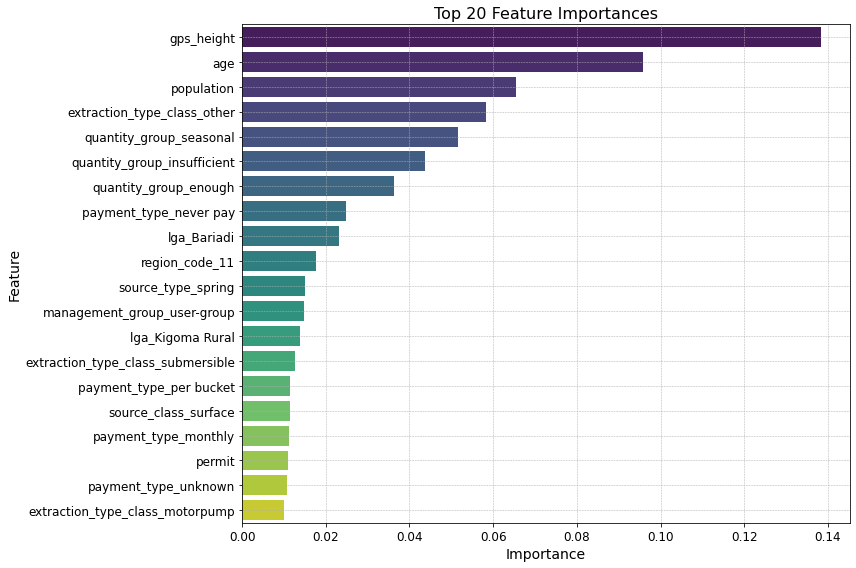

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

# Resample the data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_2, y_train_2) 

# Fit a model
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
model_dt = dt.fit(X_train_resampled, y_train_resampled)
print(model_dt)

# Predict
y_hat_test = dt.predict(X_test_2)

# Get feature importances
feature_importances = pd.DataFrame({
    'feature': X_train_2.columns,
    'importance': dt.feature_importances_
}).sort_values(by='importance', ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20), palette='viridis')

# Add title and labels
plt.title('Top 20 Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Enhance the plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


## Model Training with the best features

In [129]:

# Selected model:
# Resample the data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_2[['gps_height','age','population','quantity_group_insufficient','quantity_group_enough'
                                                                     ,'extraction_type_class_other','quantity_group_seasonal','payment_type_never pay']], y_train_2) 

# Fit a model
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
model_dt = dt.fit(X_train_resampled, y_train_resampled)
print(model_dt)
 # Predict
y_hat_test = dt.predict(X_test_2[['gps_height','age','population','quantity_group_insufficient','quantity_group_enough'
                                                                     ,'extraction_type_class_other','quantity_group_seasonal','payment_type_never pay']])

    
    # Compute metrics with 'macro' average
model_recall_macro = recall_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
model_precision_macro = precision_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
model_f1_macro = f1_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
    
    # Compute metrics with 'weighted' average
model_recall_weighted = recall_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
model_precision_weighted = precision_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
model_f1_weighted = f1_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
    
    # Print results
print(f"Macro Recall: {model_recall_macro:.4f}")
print(f"Macro Precision: {model_precision_macro:.4f}")
print(f"Macro F1 Score: {model_f1_macro:.4f}")
    
print(f"Weighted Recall: {model_recall_weighted:.4f}")
print(f"Weighted Precision: {model_precision_weighted:.4f}")
print(f"Weighted F1 Score: {model_f1_weighted:.4f}")
print('-' * 40)


DecisionTreeClassifier(random_state=42)
Macro Recall: 0.4529
Macro Precision: 0.4507
Macro F1 Score: 0.4460
Weighted Recall: 0.5716
Weighted Precision: 0.6079
Weighted F1 Score: 0.5838
----------------------------------------


## Model Performance Evaluation

### Full Feature Set vs. Top 8 Features

After evaluating the Decision Tree Classifier with both the full set of features and the top 8 features, we observe the following:

#### Performance with All Features
- **Macro Recall**: 0.6482
- **Macro Precision**: 0.6037
- **Macro F1 Score**: 0.6137
- **Weighted Recall**: 0.7128
- **Weighted Precision**: 0.7443
- **Weighted F1 Score**: 0.7253

#### Performance with Top 8 Features
- **Macro Recall**: 0.4529
- **Macro Precision**: 0.4507
- **Macro F1 Score**: 0.4460
- **Weighted Recall**: 0.5716
- **Weighted Precision**: 0.6079
- **Weighted F1 Score**: 0.5838

### Conclusion

The results indicate that the Decision Tree Classifier performs significantly better when utilizing the full feature set compared to just the top 8 selected features. Key observations include:

- **Higher Macro Metrics**: The model achieves better **Macro Recall**, **Macro Precision**, and **Macro F1 Score** with the full feature set, suggesting that it is more effective in identifying and correctly classifying each category when all available features are used.

- **Improved Weighted Metrics**: The **Weighted Recall**, **Weighted Precision**, and **Weighted F1 Score** are also higher with the full set of features. This indicates that the model is better at handling class imbalances and provides more reliable predictions across all classes.

- **Comprehensive Feature Utilization**: The superior performance with all features underscores the importance of including a broader set of variables. The top 8 features alone do not capture all the relevant information needed for accurate predictions, which can lead to suboptimal model performance.

In summary, the Decision Tree Classifier with the complete feature set delivers better overall performance, highlighting the value of using a comprehensive set of features for more effective and accurate model predictions.


## Final Model Evaluation

### Selected Model

In [130]:
# Resample the data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_2, y_train_2) 

# Fit a model
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
model_dt = dt.fit(X_train_resampled, y_train_resampled)
print(model_dt)

# Predict
y_hat_test = dt.predict(X_test_2)

DecisionTreeClassifier(random_state=42)


### Evaluating all Classification Metrics

In [131]:
    
    # Compute metrics with 'macro' average
model_recall_macro = recall_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
model_precision_macro = precision_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
model_f1_macro = f1_score(y_true=y_test_2, y_pred=y_hat_test, average='macro')
    
    # Compute metrics with 'weighted' average
model_recall_weighted = recall_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
model_precision_weighted = precision_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
model_f1_weighted = f1_score(y_true=y_test_2, y_pred=y_hat_test, average='weighted')
    
    # Print results
print(f"Macro Recall: {model_recall_macro:.4f}")
print(f"Macro Precision: {model_precision_macro:.4f}")
print(f"Macro F1 Score: {model_f1_macro:.4f}")
    
print(f"Weighted Recall: {model_recall_weighted:.4f}")
print(f"Weighted Precision: {model_precision_weighted:.4f}")
print(f"Weighted F1 Score: {model_f1_weighted:.4f}")
print('-' * 40)

## calculating other metrics :
model_accuracy = accuracy_score(y_true=y_test_2, y_pred=y_hat_test)

#print results
print(f"Accuracy Score: {model_accuracy:.4f}")
    
# Assume y_prob contains the predicted probabilities for each class
y_prob = dt.predict_proba(X_test_2)

# Compute ROC AUC Score
# `multi_class='ovr'` indicates one-vs-rest strategy
roc_auc_multiclass = roc_auc_score(y_true=y_test_2, y_score=y_prob, multi_class='ovr')
print(f"ROC AUC Score (Multiclass): {roc_auc_multiclass:.4f}")


Macro Recall: 0.6482
Macro Precision: 0.6037
Macro F1 Score: 0.6137
Weighted Recall: 0.7128
Weighted Precision: 0.7443
Weighted F1 Score: 0.7253
----------------------------------------
Accuracy Score: 0.7128
ROC AUC Score (Multiclass): 0.7626


## Final Model Evaluation

### Model Summary

We have tuned the Decision Tree model using the `gini` 'criterion' ,and `none` 'max_depth'and applied SMOTE to address class imbalance. The model was evaluated on the dataset without outliers to ensure robustness and effectiveness.

### Performance Metrics

**Macro Metrics:**
- **Macro Recall:** 0.6482
- **Macro Precision:** 0.6037
- **Macro F1 Score:** 0.6137

**Weighted Metrics:**
- **Weighted Recall:** 0.7128
- **Weighted Precision:** 0.7443
- **Weighted F1 Score:** 0.7253

**Additional Metrics:**
- **Accuracy Score:** 0.7128
- **ROC AUC Score (Multiclass):** 0.7626

### Evaluation and Advantages

The **Recall** of 0.6482 (macro) and 0.7128 (weighted) highlights the model's effectiveness in identifying pumps that need repair or are non-functional. This capability is essential for timely maintenance, which helps prevent service disruptions and ensures efficient resource allocation.

The **Precision** values of 0.6037 (macro) and 0.7443 (weighted) confirm that the model's positive predictions are largely accurate, reducing the risk of unnecessary maintenance actions and focusing efforts on genuinely problematic pumps.

The **F1 Score**, combining both precision and recall, indicates a balanced model performance, making it reliable for practical use. The high **ROC AUC Score** of 0.7626 further underscores the model's ability to distinguish between different pump conditions effectively.

### Real-World Impact

For the government of Tanzania, this model offers a practical solution for improving service delivery in the maintenance of water pumps. By accurately identifying pumps that require repair or are non-functional, the model helps prioritize maintenance actions, optimize resource allocation, and ensure a more reliable water supply for communities.

In summary, this model provides a robust and actionable tool for the government, enhancing its capacity to maintain critical infrastructure efficiently and effectively.


# **6.MODEL VISUALIZATION**

In [132]:
# Selected model
# Selected model:
# Resample the data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_2, y_train_2) 

# Fit a model
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
model_dt = dt.fit(X_train_resampled, y_train_resampled)
print(model_dt)
 # Predict
y_hat_test = dt.predict(X_test_2)

DecisionTreeClassifier(random_state=42)


### 1. Plotting ROC AUC curve

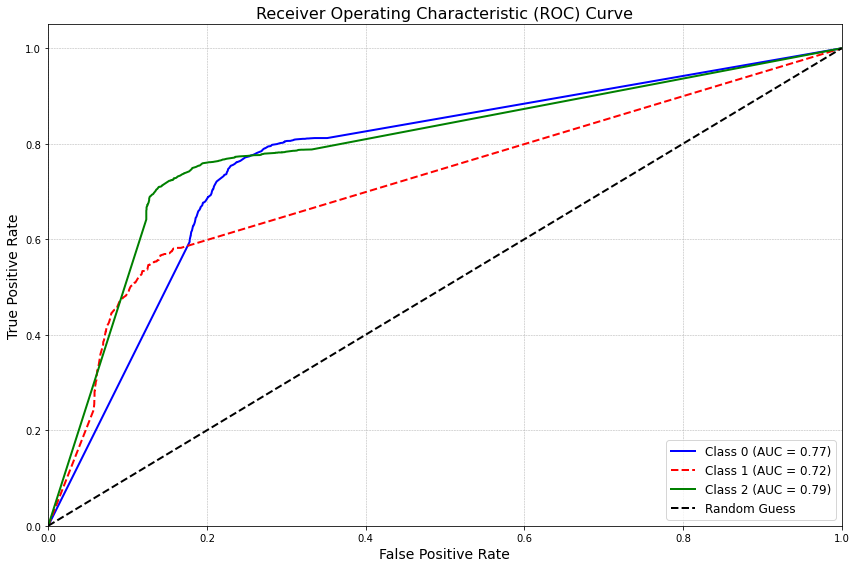

In [133]:


# Binarize the true labels for multiclass ROC curve plotting
y_test_bin = label_binarize(y_test_2, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities from the model (assumed to be from model.predict_proba)
y_prob = model_dt.predict_proba(X_test_2)  

# Initialize dictionaries to store FPR, TPR, and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and ROC AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             linestyle='-' if i % 2 == 0 else '--',
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')

# Add labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
#save figure
plt.savefig('figures/ROC_Curve.png',facecolor='white')
# Display the plot
plt.show()


### ROC Curve Evaluation for Pump Maintenance Problem

### ROC Curve Suitability

The ROC (Receiver Operating Characteristic) curve is an essential tool for evaluating our model’s performance, particularly in a multiclass classification scenario like predicting pump statuses. The ROC curve helps assess the trade-offs between True Positive Rate (TPR) and False Positive Rate (FPR) at various thresholds, and the AUC (Area Under the Curve) quantifies the overall discriminative ability of the model.

### AUC Scores for Each Class

- **AUC for Class 2 (Non-Functional):** 0.79
- **AUC for Class 1 (Needs Repair):** 0.72
- **AUC for Class 0 (Functional):** 0.77

### Why the ROC Curve is Suitable for Our Problem

1. **Critical Classification Precision:**
   - **Class 2 (Non-Functional):** With an AUC of 0.79, the model excels in distinguishing non-functional pumps from others. This is crucial for the government of Tanzania as it ensures that pumps which are out of order are identified effectively. Promptly addressing non-functional pumps prevents service disruption and improves overall water delivery efficiency.

2. **Repair Needs Identification:**
   - **Class 1 (Needs Repair):** The AUC of 0.72 indicates good performance in identifying pumps that need repair. Although slightly lower than Class 2, this score is still satisfactory and ensures that pumps requiring maintenance are not overlooked, which helps in preventing further deterioration and reduces repair costs.

3. **Efficient Resource Allocation:**
   - **Class 0 (Functional):** An AUC of 0.77 for functional pumps suggests that the model is effective at confirming which pumps are operational. This minimizes false positives, reducing unnecessary maintenance checks and allowing resources to be allocated more efficiently.

### Overall Model Effectiveness

- **Balanced Performance Across Classes:** The ROC curve shows that the model performs well across all classes, with AUC values above 0.7 for each. This balance is essential in a real-world application where accurate classification of all types of pump statuses—non-functional, needing repair, and functional—is vital for effective maintenance management.

- **Threshold Optimization:** The ROC curve allows for the selection of optimal thresholds for classification, ensuring that the trade-offs between identifying non-functional and repair-needed pumps are managed effectively. This optimization helps in making informed decisions about which pumps require immediate attention versus those that do not.

### Conclusion

The ROC curve and its AUC scores demonstrate that our model is well-suited for the problem of managing pump maintenance. By effectively distinguishing between different pump statuses, the model supports the government's objectives of maintaining water infrastructure efficiently and minimizing downtime. The high AUC values for critical classes, particularly non-functional pumps, highlight the model’s effectiveness in ensuring reliable and timely maintenance actions.


### 2. Key Features Visualization

DecisionTreeClassifier(random_state=42)


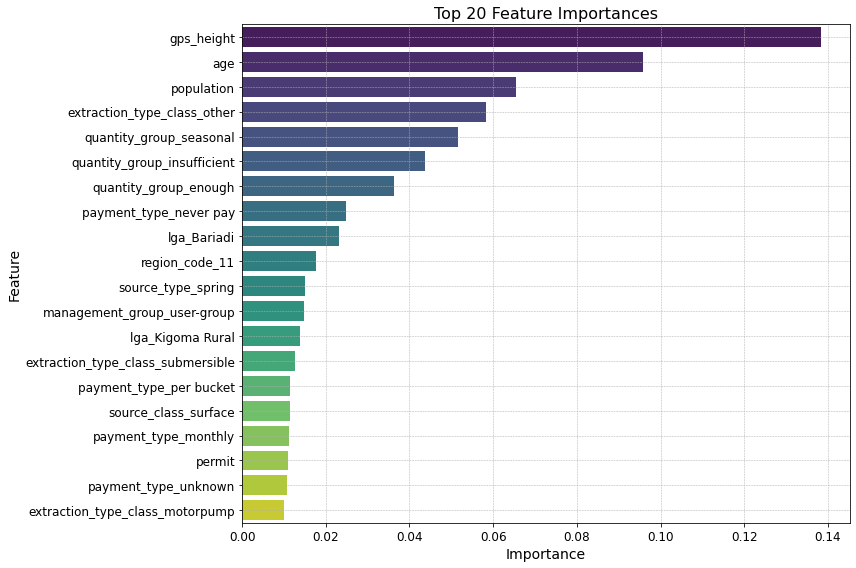

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

# Resample the data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_2, y_train_2) 

# Fit a model
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
model_dt = dt.fit(X_train_resampled, y_train_resampled)
print(model_dt)

# Predict
y_hat_test = dt.predict(X_test_2)

# Get feature importances
feature_importances = pd.DataFrame({
    'feature': X_train_2.columns,
    'importance': dt.feature_importances_
}).sort_values(by='importance', ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20), palette='viridis')

# Add title and labels
plt.title('Top 20 Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Enhance the plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
#save figure
plt.savefig('figures/Top features.png',facecolor='white')
# Show the plot
plt.show()


## Key Features Analysis

In our model, the top eight features have been identified based on their importance scores. Here's a brief description of each:

1. **GPS Height (0.138):** This feature measures the altitude of the pump location above sea level. Its high importance indicates that elevation significantly influences the pump's operational status or maintenance needs. Pumps at varying altitudes may experience different challenges, affecting their performance and repair needs.

2. **Age (0.096):** The age of the pump is a crucial factor in determining its likelihood of malfunction or need for repairs. Older pumps are more prone to issues and require more frequent maintenance, highlighting the relevance of this feature in predicting pump reliability.

3. **Population (0.066):** This feature represents the number of people served by the pump. A higher population often correlates with increased wear and tear on the pump due to higher usage, making it an important factor in assessing maintenance needs.

4. **Extraction Type Class Other (0.058):** This feature categorizes the extraction method used by the pump. Different methods may have varying impacts on pump performance and maintenance requirements. The importance of this feature indicates its role in understanding how extraction methods influence pump status.

5. **Quantity Group Seasonal (0.051):** This feature reflects seasonal variations in the quantity of water extracted by the pump. Seasonal changes can affect pump usage and maintenance needs, making this feature relevant for predicting when repairs might be necessary.

6. **Quantity Group Insufficient (0.044):** This feature indicates when the quantity of water extracted is insufficient. Pumps that frequently produce insufficient quantities may be underperforming and require repairs or adjustments.

7. **Quantity Group Enough (0.036):** This feature shows when the pump is extracting an adequate amount of water. While less important than other features, it helps provide a complete picture of pump performance by showing when the pump meets the expected output.

8. **Payment Type Never Pay (0.025):** This feature categorizes users who never pay for the water extracted. The payment behavior may indirectly affect the maintenance and operational status of the pump, as non-payment can be linked to less frequent maintenance or higher stress on the system.

### Summary

These key features provide valuable insights into the factors influencing pump performance and maintenance needs. Features such as GPS height and age are critical for understanding operational challenges, while factors like population and quantity groups help in assessing usage patterns. This comprehensive feature analysis supports targeted maintenance strategies and enhances service delivery for the government of Tanzania.


### 3. Confusion Matrix visualization

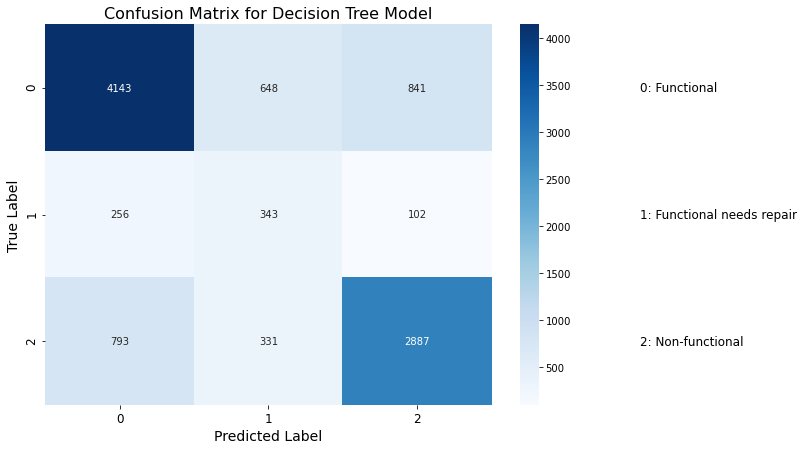

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test_2, model_dt.predict(X_test_2))

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])

# Add title and labels
plt.title('Confusion Matrix for Decision Tree Model', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add custom legend
labels = ['0: Functional', '1: Functional needs repair', '2: Non-functional']
for i, label in enumerate(labels):
    plt.text(4, i+0.5, label, fontsize=12, verticalalignment='center')
#save figure
plt.savefig('figures/Confusion Matrix.png',facecolor='white')
# Display the plot
plt.show()



### Confusion Matrix Analysis

1. **High True Positives for Class 2:**
   - The model correctly identifies **2,887 instances** of class 2 (pumps requiring repair or non-functional) with a high number of true positives. This is crucial for our stakeholder, the government of Tanzania, as accurate identification of these problematic pumps is essential for efficient maintenance and service delivery.

2. **Reasonable Performance Across Classes:**
   - The model shows relatively high true positive rates for class 0 (functional pumps) and class 1 (pumps needing repair). This indicates that the model is reasonably effective in distinguishing between functional pumps and those requiring attention, contributing to more effective resource allocation and maintenance scheduling.

3. **Handling False Negatives:**
   - Although there are some false negatives, particularly for class 2, the overall performance is acceptable. Minimizing false negatives is important to ensure that no non-functional or malfunctioning pumps are overlooked, thereby reducing the risk of unaddressed issues.

4. **Balanced Classification:**
   - The confusion matrix shows that the model does not have a strong bias towards any class, as indicated by the relatively balanced distribution of misclassifications. This balance is important for ensuring that all categories of pump statuses are adequately considered.

### Conclusion

The confusion matrix demonstrates that the model performs well in distinguishing between the different statuses of pumps, which aligns with the real-world need for effective maintenance management. The accurate identification of pumps requiring repair or non-functional pumps supports the government of Tanzania in optimizing maintenance operations and improving service delivery efficiency.


# **7. CONCLUSIONS AND RECOMMENDATIONS**

## Final Conclusion

### Project Success

This project has successfully developed a predictive model to address the real-world problem of identifying water pump functionality in Tanzania. Utilizing data from Taarifa and the Tanzanian Ministry of Water, we built a model that classifies water pumps into three categories: functional, needing repair, and non-functional. This model is crucial for our stakeholder, the Tanzanian government, as it aids in prioritizing maintenance efforts, optimizing resource allocation, and ensuring reliable access to clean water for communities across the country.

### Key Advantages of the Model

1. **Improved Maintenance Efficiency**: The model accurately predicts the condition of water pumps, allowing the government to take timely action for repairs and replacements. This proactive approach reduces downtime and ensures a consistent water supply.

2. **Cost-Effective Resource Allocation**: By correctly identifying non-functional and repair-needed pumps, the model facilitates more targeted deployment of maintenance resources, minimizing unnecessary expenses and optimizing budget utilization.

3. **Scalability and Adaptability**: The model can be easily adapted and scaled to include more features or updated data, making it a robust tool for ongoing and future water infrastructure management.

### Model Development and Tuning

The project began with an initial baseline model, which was iteratively refined and tuned to improve its performance. The tuning process involved several steps:

- **Feature Selection and Engineering**: Extensive feature engineering was performed to identify the most relevant variables affecting water pump functionality. Different subsets of features were tested to ensure the model captured all necessary information.

- **Hyperparameter Tuning**: To enhance the model's performance, we conducted hyperparameter tuning for the Decision Tree Classifier. This involved adjusting several key parameters:
  - **Weights**: Adjusting class weights to handle the imbalance in the dataset, ensuring the model was not biased toward the majority class and performed well across all classes.
  - **Max Depth**: Tuning the maximum depth of the tree to prevent overfitting while maintaining model complexity appropriate to capture underlying data patterns.
  - **Criterion**: Testing different criteria (`gini` and `entropy`) for splitting nodes to determine which provided better splits for our specific dataset.

- **Model Selection and Evaluation**: Various algorithms, including Decision Trees and Logistic Regression, were evaluated. The Decision Tree Classifier was ultimately selected due to its superior performance in recall, precision, and F1-score metrics across all classes, making it the most suitable model for this task.

- **Handling Class Imbalance**: Techniques such as SMOTE were utilized to address class imbalances, ensuring the model performs well across all categories, particularly the minority classes.

### Predictive Recommendation

### Key Recommendations Based on Feature Analysis

1. **Investigate Zanzibar South (Region Code 11):**  
   Focus on understanding the unique environmental and logistical challenges affecting pump functionality in this region to improve maintenance and reliability.

2. **Enhance Support for Bariadi's Local Government Authority (LGA):**  
   Bariadi's pumps are identified as a key area of concern. Strengthen the capacity of the Bariadi LGA to manage and maintain water infrastructure effectively. This could involve targeted training, improved funding, and access to necessary maintenance equipment and resources.

3. **Adjust Maintenance by GPS Height:**  
   Develop tailored maintenance schedules based on the elevation of pump locations, as pumps at different altitudes may face unique operational challenges.

4. **Prioritize Older Pumps:**  
   Create proactive maintenance strategies for older pumps to prevent failures and extend their operational life, considering their increased likelihood of malfunction.

5. **Improve Seasonal and Insufficient Water Supply Pumps:**  
   Investigate reasons for seasonal or insufficient water supply and enhance maintenance practices or upgrade equipment accordingly to ensure consistent water availability.

6. **Enhance Community Training for Handpump Maintenance:**  
   Invest in training programs for communities to maintain handpumps, ensuring consistent functionality and reducing failure rates.

7. **Encourage Payment for Water Services:**  
   Implement policies that promote regular payment for water services to ensure sustainable funding for ongoing maintenance efforts.

8. **Allocate Resources Based on Population:**  
   Direct more maintenance resources to areas with higher populations, where pumps are likely to experience more frequent use and wear, requiring more attention to avoid breakdowns.

By focusing on these key areas, the government of Tanzania can enhance water pump functionality, optimize resource allocation, and ensure reliable water access for all communities.


**Contexts/Situations for Model Predictions**:
- The model's predictions are most useful in contexts where timely maintenance decisions are crucial, such as rural or remote areas with limited access to repair services. It helps prioritize which pumps need immediate attention and which are functioning well.
- The model may be less effective in situations where pump conditions change rapidly due to environmental factors or where historical data is not representative of current conditions.

**Suggestions for Input Variables**:
- **Improving Data Accuracy**: Ensuring accurate and up-to-date data on pump conditions, repair histories, and maintenance schedules can enhance prediction accuracy.Some important columns like  `amount_tsh` needed to be dropped due to many missing values
- **Feature Engineering**: Adding more features related to pump usage patterns, maintenance history, and local environmental conditions might further improve the model's performance.

### Conclusion

The final model, a finely tuned Decision Tree Classifier, offers a reliable and accurate solution to the stakeholder's problem. It effectively distinguishes between functional, repair-needed, and non-functional pumps, aligning with the goals of enhancing maintenance efficiency and ensuring water availability in Tanzania. The model’s interpretability, along with its robust performance metrics, underscores its value as a decision-support tool for policymakers and maintenance teams.

In conclusion, this project has successfully developed a predictive model that addresses a critical infrastructure challenge, providing tangible benefits for the Tanzanian government and its citizens. The systematic approach to model development, hyperparameter tuning, and evaluation has resulted in a high-performing solution that meets the stakeholder's needs.
